In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import json
import re
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#hiding warnings for clean display
warnings.filterwarnings('ignore')
#to configure some options
%matplotlib inline
%config InlineBackend.figure_format='retina'
#for interactive plots %matplotlib notebook

#hiding warnings for clean display
warnings.filterwarnings('ignore')
df_10=pd.read_csv('Data/2010_car_data.csv')
df_20=pd.read_csv('Data/2020_car_data.csv')

In [2]:
#Shape of 2010 dataset and 2020 dataset:
df_10.shape,df_20.shape

((3277, 64), (4442, 67))

In [3]:
#2010 Dataset:
df_10.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2010,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.9,9ASXV05.9VH1,Car,...,17.40,0.2270,0.0209,NaN,NaN,N,NaN,NaN,N,No averaging


In [4]:
#2020 Dataset
df_20.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.2,KASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [5]:
#duplicates of 2010 dataset
#we find the duplicated value count in 2010 dataset
df_10.duplicated().sum()

0

In [6]:
#null value count of 2010 dataset
df_10.isnull().sum()

Model Year                        0
Vehicle Manufacturer Name         0
Veh Mfr Code                      0
Represented Test Veh Make         0
Represented Test Veh Model        0
                               ... 
Police - Emergency Vehicle?       0
Averaging Group ID             3209
Averaging Weighting Factor     3209
Averaging Method Cd               0
Averging Method Desc              0
Length: 64, dtype: int64

In [7]:
#data types of 2010 dataset
df_10.dtypes

Model Year                       int64
Vehicle Manufacturer Name       object
Veh Mfr Code                    object
Represented Test Veh Make       object
Represented Test Veh Model      object
                                ...   
Police - Emergency Vehicle?     object
Averaging Group ID              object
Averaging Weighting Factor     float64
Averaging Method Cd             object
Averging Method Desc            object
Length: 64, dtype: object

In [8]:
#check unique numbers for each column
df_10.nunique()

Model Year                       1
Vehicle Manufacturer Name       33
Veh Mfr Code                    33
Represented Test Veh Make       55
Represented Test Veh Model     524
                              ... 
Police - Emergency Vehicle?      2
Averaging Group ID               3
Averaging Weighting Factor      11
Averaging Method Cd              3
Averging Method Desc             3
Length: 64, dtype: int64

In [9]:
#duplicates of 2020 dataset
df_20.duplicated().sum()

0

In [10]:
#null value of 2020 dataset
df_20.isnull().sum()

Model Year                        0
Vehicle Manufacturer Name         0
Veh Mfr Code                      0
Represented Test Veh Make         0
Represented Test Veh Model        0
                               ... 
Police - Emergency Vehicle?       0
Averaging Group ID             4348
Averaging Weighting Factor     4348
Averaging Method Cd               0
Averging Method Desc              0
Length: 67, dtype: int64

In [11]:
#data types of 2020 dataset
df_20.dtypes

Model Year                       int64
Vehicle Manufacturer Name       object
Veh Mfr Code                    object
Represented Test Veh Make       object
Represented Test Veh Model      object
                                ...   
Police - Emergency Vehicle?     object
Averaging Group ID              object
Averaging Weighting Factor     float64
Averaging Method Cd             object
Averging Method Desc            object
Length: 67, dtype: object

In [12]:
#check unique numbers for each column
df_20.nunique()

Model Year                       1
Vehicle Manufacturer Name       30
Veh Mfr Code                    30
Represented Test Veh Make       57
Represented Test Veh Model     765
                              ... 
Police - Emergency Vehicle?      2
Averaging Group ID              16
Averaging Weighting Factor       3
Averaging Method Cd              2
Averging Method Desc             2
Length: 67, dtype: int64

In [13]:
#view the datasets
#2010 dataset
df_10.head(1).columns

Index(['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code',
       'Represented Test Veh Make', 'Represented Test Veh Model',
       'Test Vehicle ID', 'Test Veh Configuration #',
       'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type',
       'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code',
       'Tested Transmission Type Code', 'Tested Transmission Type',
       '# of Gears', 'Transmission Lockup?', 'Drive System Code',
       'Drive System Description', 'Transmission Overdrive Code',
       'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)',
       'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd',
       'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator',
       'Analytically Derived FE?', 'ADFE Test Number',
       'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)',
       'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description',
       'Test Fuel Type Cd', 'Test Fuel Type Descripti

In [14]:
#2020 dataset
df_20.head(1).columns

Index(['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code',
       'Represented Test Veh Make', 'Represented Test Veh Model',
       'Test Vehicle ID', 'Test Veh Configuration #',
       'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type',
       'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code',
       'Tested Transmission Type Code', 'Tested Transmission Type',
       '# of Gears', 'Transmission Lockup?', 'Drive System Code',
       'Drive System Description', 'Transmission Overdrive Code',
       'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)',
       'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd',
       'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator',
       'Analytically Derived FE?', 'ADFE Test Number',
       'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)',
       'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description',
       'Test Fuel Type Cd', 'Test Fuel Type Descripti

In [15]:
df_10['Averaging Group ID'].isna().sum(),df_20['Averaging Group ID'].isna().sum()

(3209, 4348)

In [16]:
df_10['Averaging Weighting Factor'].isna().sum(),df_20['Averaging Weighting Factor'].isna().sum()

(3209, 4348)

In [3]:
df_10.describe()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Averaging Weighting Factor
count,3277.0,3277.000000,3277.000000,3277.000000,2430.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,...,509.000000,413.000000,18.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,68.000000
mean,2010.0,2.098871,3.472831,263.988404,5.951852,5.278303,1.986878,4274.012817,3.620183,33.015532,...,24.502505,26.052512,54.645690,37.715229,0.382956,0.022330,15.511609,0.115882,0.023742,0.500000
std,0.0,4.067725,1.296540,107.505203,1.733995,1.463453,0.113814,855.587182,0.647593,6.447400,...,9.526437,6.858685,19.641331,9.900689,0.332357,0.007764,8.992054,0.279130,0.014702,0.101098
min,2010.0,0.000000,0.001000,35.000000,3.000000,1.000000,1.000000,2125.000000,1.000000,8.400000,...,8.200000,10.900000,22.900220,1.843000,-0.735900,0.002480,-31.798000,-0.813000,-0.086800,0.300000
25%,2010.0,0.000000,2.400000,175.000000,4.000000,5.000000,2.000000,3625.000000,3.230000,28.600000,...,18.800000,21.300000,38.746995,30.465000,0.162370,0.017530,9.930000,-0.058000,0.018500,0.500000
50%,2010.0,1.000000,3.195000,255.000000,6.000000,6.000000,2.000000,4000.000000,3.540000,32.000000,...,22.656700,25.030000,58.965000,36.936000,0.341830,0.020295,14.850000,0.090000,0.021380,0.500000
75%,2010.0,2.000000,4.300000,315.000000,8.000000,6.000000,2.000000,4750.000000,3.910000,37.100000,...,28.025400,29.400000,63.489175,43.370000,0.581400,0.026160,20.600000,0.263000,0.027560,0.500000
max,2010.0,50.000000,8.400000,1001.000000,12.000000,8.000000,2.000000,6500.000000,6.470000,126.400000,...,98.024062,54.080187,101.535633,71.280000,1.553100,0.200000,96.000000,1.310000,0.300000,0.700000


In [4]:
df_20.describe()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Averaging Weighting Factor
count,4442.0,4442.000000,4442.000000,4442.000000,4270.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,...,4238.000000,4238.000000,4238.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,4442.000000,94.000000
mean,2020.0,1.065286,3.258767,298.985817,5.403044,6.410401,1.960153,4347.731878,3.678235,29.166592,...,2.959698,2.845102,2.514337,40.034602,0.215047,0.023168,12.087009,0.129649,0.022979,0.500000
std,0.0,1.722016,6.313483,158.925213,1.822105,2.872618,0.195621,832.149989,1.104226,13.406431,...,15.427764,15.290976,16.089505,12.560812,0.315625,0.006610,11.725792,0.359195,0.015227,0.031109
min,2020.0,0.000000,0.001000,1.000000,2.000000,1.000000,1.000000,2375.000000,0.000000,0.000000,...,-26.876330,-21.885017,-10.470000,15.431000,-0.777300,0.009400,-99.900000,-1.975200,-0.031400,0.350000
25%,2020.0,0.000000,2.000000,181.000000,4.000000,6.000000,2.000000,3750.000000,3.150000,24.000000,...,-0.658785,-0.507542,-0.530000,30.700000,0.045240,0.018554,5.802500,-0.008675,0.017381,0.500000
50%,2020.0,0.000000,2.500000,272.000000,4.000000,7.000000,2.000000,4250.000000,3.450000,26.300000,...,0.510000,0.339423,-0.110000,38.780000,0.241800,0.022100,11.590000,0.111800,0.021000,0.500000
75%,2020.0,1.000000,3.500000,362.000000,6.000000,8.000000,2.000000,5000.000000,3.830000,30.100000,...,2.118888,1.522775,0.258748,48.000000,0.403745,0.026190,18.360000,0.237000,0.025520,0.500000
max,2020.0,19.000000,99.999000,1500.000000,16.000000,10.000000,2.000000,6500.000000,9.670000,155.100000,...,99.990000,99.990000,99.990000,86.799000,1.403000,0.052210,64.520000,8.580000,0.253860,0.650000


In [17]:
#1. dropping extraneous columns from 2020 dataset
df_20.drop(['DT-Inertia Work Ratio Rating','DT-Absolute Speed Change Ratg', 'DT-Energy Economy Rating','Averaging Group ID','Averaging Weighting Factor',
'ADFE Test Number','ADFE Total Road Load HP','ADFE Equiv. Test Weight (lbs.)','ADFE N/V Ratio','PM (g/mi)','CH4 (g/mi)','N2O (g/mi)','FE Bag 4'],axis=1,inplace=True)
df_10.drop(['Averaging Group ID','Averaging Weighting Factor','ADFE Test Number','ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)','ADFE N/V Ratio','PM (g/mi)','CH4 (g/mi)','N2O (g/mi)','FE Bag 4'],axis=1,inplace=True)
df_10.shape,df_20.shape

((3277, 54), (4442, 54))

In [18]:
#replace spaces with underscores and lowercase labels for 2010 dataset
df_10.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)
df_10.head(1)

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,0.8444,0.0119,19.11,0.432,0.0147,NaN,NaN,N,N,No averaging


In [19]:
#replace spaces with underscores and lowercase labels for 2020 dataset
df_20.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)
df_20.head(1)

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging


In [20]:
#confirm if column labels for 2010 and 2020 datasets are identical or not
df_10.columns==df_20.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [21]:
#making sure if all are identical
(df_10.columns==df_20.columns).all()
df_10

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.900,9ASXV05.9VH1,Car,...,0.8444,0.01190,19.11,0.4320,0.01470,NaN,NaN,N,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.900,9ASXV05.9VH1,Car,...,0.8444,0.01190,19.11,0.4320,0.01470,NaN,NaN,N,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.900,AASXV05.9VH1,Car,...,0.8444,0.01190,2.23,0.6948,0.01300,TWC,Three-way catalyst,N,N,No averaging
3,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.900,AASXV05.9VH1,Car,...,0.8444,0.01190,2.23,0.6948,0.01300,TWC,Three-way catalyst,N,N,No averaging
4,2010,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.900,9ASXV05.9VH1,Car,...,0.7502,0.01630,17.40,0.2270,0.02090,NaN,NaN,N,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2010,Volvo,VVX,Volvo,XC90 FWD,200904,2,3.192,AVVXJ03.2U2N,Both,...,0.1783,0.02663,22.50,0.1590,0.30000,TWC,Three-way catalyst,N,N,No averaging
3273,2010,Volvo,VVX,Volvo,XC90 FWD,200904,2,3.192,AVVXJ03.2U2N,Both,...,0.1783,0.02663,20.14,0.1276,0.02674,TWC,Three-way catalyst,N,N,No averaging
3274,2010,Volvo,VVX,Volvo,XC90 FWD,200904,2,3.192,AVVXJ03.2U2N,Both,...,0.1783,0.02663,20.14,0.1276,0.02674,TWC,Three-way catalyst,N,N,No averaging
3275,2010,Volvo,VVX,Volvo,XC90 V8 AWD,200713,2,4.414,AVVXJ04.4U2N,Both,...,0.1588,0.02615,29.65,-0.0549,0.02725,TWC,Three-way catalyst,N,N,No averaging


In [22]:
#creating new datasets for further section

df_10.to_csv('Data/car_data_2010_v1.csv',index=False)
df_20.to_csv('Data/car_data_2020_v2.csv',index=False)
df_10.shape,df_20.shape

((3277, 54), (4442, 54))

In [23]:
#load datasets
import pandas as pd
df_10_v1=pd.read_csv('Data/car_data_2010_v1.csv')
df_20_v1=pd.read_csv('Data/car_data_2020_v2.csv')
df_10_v1.shape,df_20_v1.shape

((3277, 54), (4442, 54))

In [24]:
#count of null values in columns of both datasets
df_10_v1.isna().sum(), df_20_v1.isna().sum()

(model_year                           0
 vehicle_manufacturer_name            0
 veh_mfr_code                         0
 represented_test_veh_make            0
 represented_test_veh_model           0
 test_vehicle_id                      0
 test_veh_configuration_#             0
 test_veh_displacement_(l)            0
 actual_tested_testgroup              0
 vehicle_type                         0
 rated_horsepower                     0
 #_of_cylinders_and_rotors          847
 engine_code                          0
 tested_transmission_type_code        0
 tested_transmission_type             0
 #_of_gears                           0
 transmission_lockup?                 0
 drive_system_code                    0
 drive_system_description             0
 transmission_overdrive_code          0
 transmission_overdrive_desc          0
 equivalent_test_weight_(lbs.)        0
 axle_ratio                           0
 n/v_ratio                            0
 shift_indicator_light_use_cd         0


In [25]:
#drop rows with any null values in both datasets
#fill the NaN values with with respective most frequent values
df_10_v1['#_of_cylinders_and_rotors']=df_10_v1['#_of_cylinders_and_rotors'].fillna(df_10_v1['#_of_cylinders_and_rotors'].mode()[0])
df_20_v1['#_of_cylinders_and_rotors']=df_20_v1['#_of_cylinders_and_rotors'].fillna(df_20_v1['#_of_cylinders_and_rotors'].mode()[0])
df_10_v1['thc_(g/mi)']=df_10_v1['thc_(g/mi)'].fillna(df_10_v1['thc_(g/mi)'].mode()[0])
df_20_v1['thc_(g/mi)']=df_20_v1['thc_(g/mi)'].fillna(df_20_v1['thc_(g/mi)'].mode()[0])
df_10_v1['co_(g/mi)']=df_10_v1['co_(g/mi)'].fillna(df_10_v1['co_(g/mi)'].mode()[0])
df_20_v1['co_(g/mi)']=df_20_v1['co_(g/mi)'].fillna(df_20_v1['co_(g/mi)'].mode()[0])
df_10_v1['co2_(g/mi)']=df_10_v1['co2_(g/mi)'].fillna(df_10_v1['co2_(g/mi)'].mode()[0])
df_20_v1['co2_(g/mi)']=df_20_v1['co2_(g/mi)'].fillna(df_20_v1['co2_(g/mi)'].mode()[0])
df_10_v1['nox_(g/mi)']=df_10_v1['nox_(g/mi)'].fillna(df_10_v1['nox_(g/mi)'].mode()[0])
df_20_v1['nox_(g/mi)']=df_20_v1['nox_(g/mi)'].fillna(df_20_v1['nox_(g/mi)'].mode()[0])
df_10_v1['fe_bag_1']=df_10_v1['fe_bag_1'].fillna(df_10_v1['fe_bag_1'].mode()[0])
df_20_v1['fe_bag_1']=df_20_v1['fe_bag_1'].fillna(df_20_v1['fe_bag_1'].mode()[0])
df_10_v1['fe_bag_2']=df_10_v1['fe_bag_2'].fillna(df_10_v1['fe_bag_2'].mode()[0])
df_20_v1['fe_bag_2']=df_20_v1['fe_bag_2'].fillna(df_20_v1['fe_bag_2'].mode()[0])
df_10_v1['fe_bag_3']=df_10_v1['fe_bag_3'].fillna(df_10_v1['fe_bag_3'].mode()[0])
df_20_v1['fe_bag_3']=df_20_v1['fe_bag_3'].fillna(df_20_v1['fe_bag_3'].mode()[0])
df_10_v1['aftertreatment_device_cd']=df_10_v1['aftertreatment_device_cd'].fillna(df_10_v1['aftertreatment_device_cd'].mode()[0])
df_20_v1['aftertreatment_device_cd']=df_20_v1['aftertreatment_device_cd'].fillna(df_20_v1['aftertreatment_device_cd'].mode()[0])
df_10_v1['aftertreatment_device_desc']=df_10_v1['aftertreatment_device_desc'].fillna(df_10_v1['aftertreatment_device_desc'].mode()[0])
df_20_v1['aftertreatment_device_desc']=df_20_v1['aftertreatment_device_desc'].fillna(df_20_v1['aftertreatment_device_desc'].mode()[0])


In [26]:
#check for any more null values
df_10_v1.isna().sum(), df_20_v1.isna().sum()

(model_year                        0
 vehicle_manufacturer_name         0
 veh_mfr_code                      0
 represented_test_veh_make         0
 represented_test_veh_model        0
 test_vehicle_id                   0
 test_veh_configuration_#          0
 test_veh_displacement_(l)         0
 actual_tested_testgroup           0
 vehicle_type                      0
 rated_horsepower                  0
 #_of_cylinders_and_rotors         0
 engine_code                       0
 tested_transmission_type_code     0
 tested_transmission_type          0
 #_of_gears                        0
 transmission_lockup?              0
 drive_system_code                 0
 drive_system_description          0
 transmission_overdrive_code       0
 transmission_overdrive_desc       0
 equivalent_test_weight_(lbs.)     0
 axle_ratio                        0
 n/v_ratio                         0
 shift_indicator_light_use_cd      0
 shift_indicator_light_use_desc    0
 test_number                       0
 

In [27]:
#shape of datasets after filling NaN values
df_10_v1.shape,df_20_v1.shape

((3277, 54), (4442, 54))

In [28]:
#dropping rows with null values in 2010 dataset
df_10_v1.dropna(inplace=True)
#dropping rows with null values in 2020 dataset
df_20_v1.dropna(inplace=True)

In [29]:
#shape of datasets after dropping null-valued rows
df_10_v1.shape,df_20_v1.shape

((3274, 54), (4400, 54))

In [30]:
#check for null values in any columns of both datasets
df_10_v1.isnull().sum().any(), df_20_v1.isnull().sum().any()

(False, False)

In [31]:
#dedupe data :drop duplicates
df_10_v1.drop_duplicates(inplace=True)
df_20_v1.drop_duplicates(inplace=True)

In [32]:
#checking for any duplicated values in datasets
df_10_v1.duplicated().sum(),df_20_v1.duplicated().sum()

(0, 0)

In [33]:
#shape of both datasets
df_10_v1.shape,df_20_v1.shape

((3274, 54), (4400, 54))

In [34]:
#creating new datasets for further section
df_10_v1.to_csv('Data/car_data_2010_v3.csv',index=False)
df_20_v1.to_csv('Data/car_data_2020_v4.csv',index=False)

In [35]:
#load datasets
import pandas as pd
df_10_v2=pd.read_csv('Data/car_data_2010_v3.csv')
df_20_v2=pd.read_csv('Data/car_data_2020_v4.csv')

In [36]:
#2010 dataset old
df_10_v1.head()

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,0.8444,0.0119,19.11,0.4320,0.0147,TWC,Three-way catalyst,N,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,0.8444,0.0119,19.11,0.4320,0.0147,TWC,Three-way catalyst,N,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,N,No averaging
3,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,N,No averaging
4,2010,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.9,9ASXV05.9VH1,Car,...,0.7502,0.0163,17.40,0.2270,0.0209,TWC,Three-way catalyst,N,N,No averaging


In [37]:
#2020 dataset old
df_20_v1.head()

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.2,KASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging


In [38]:
#2010 dataset revised
df_10_v2.head()

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,0.8444,0.0119,19.11,0.4320,0.0147,TWC,Three-way catalyst,N,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,0.8444,0.0119,19.11,0.4320,0.0147,TWC,Three-way catalyst,N,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,N,No averaging
3,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,N,No averaging
4,2010,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.9,9ASXV05.9VH1,Car,...,0.7502,0.0163,17.40,0.2270,0.0209,TWC,Three-way catalyst,N,N,No averaging


In [39]:
#2020 dataset revised
df_20_v2.head()

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.2,KASXV05.2AM5,Car,...,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,N,No averaging


In [40]:
#shape of revised datasets
df_10_v2.shape,df_20_v2.shape

((3274, 54), (4400, 54))

In [41]:
#locate a random row in 2010 dataset
df_10_v2.iloc[400]

model_year                                              2010
vehicle_manufacturer_name                                BMW
veh_mfr_code                                             BMX
represented_test_veh_make                                BMW
represented_test_veh_model                             535xi
test_vehicle_id                                      CK93004
test_veh_configuration_#                                   7
test_veh_displacement_(l)                                  3
actual_tested_testgroup                         9BMXV03.054R
vehicle_type                                             Car
rated_horsepower                                         300
#_of_cylinders_and_rotors                                  6
engine_code                                   3.0-M-N54-X60R
tested_transmission_type_code                              M
tested_transmission_type                              Manual
#_of_gears                                                 6
transmission_lockup?    

In [42]:
# Save your final CLEAN datasets as new files!
df_10_v2.to_csv('Data/clean_10.csv', index=False)
df_20_v2.to_csv('Data/clean_20.csv', index=False)

In [43]:
#read datasets for further visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
cdf_10=pd.read_csv('Data/clean_10.csv')
cdf_20=pd.read_csv('Data/clean_20.csv')

In [44]:
#visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E90A1400>,
      dtype=object)

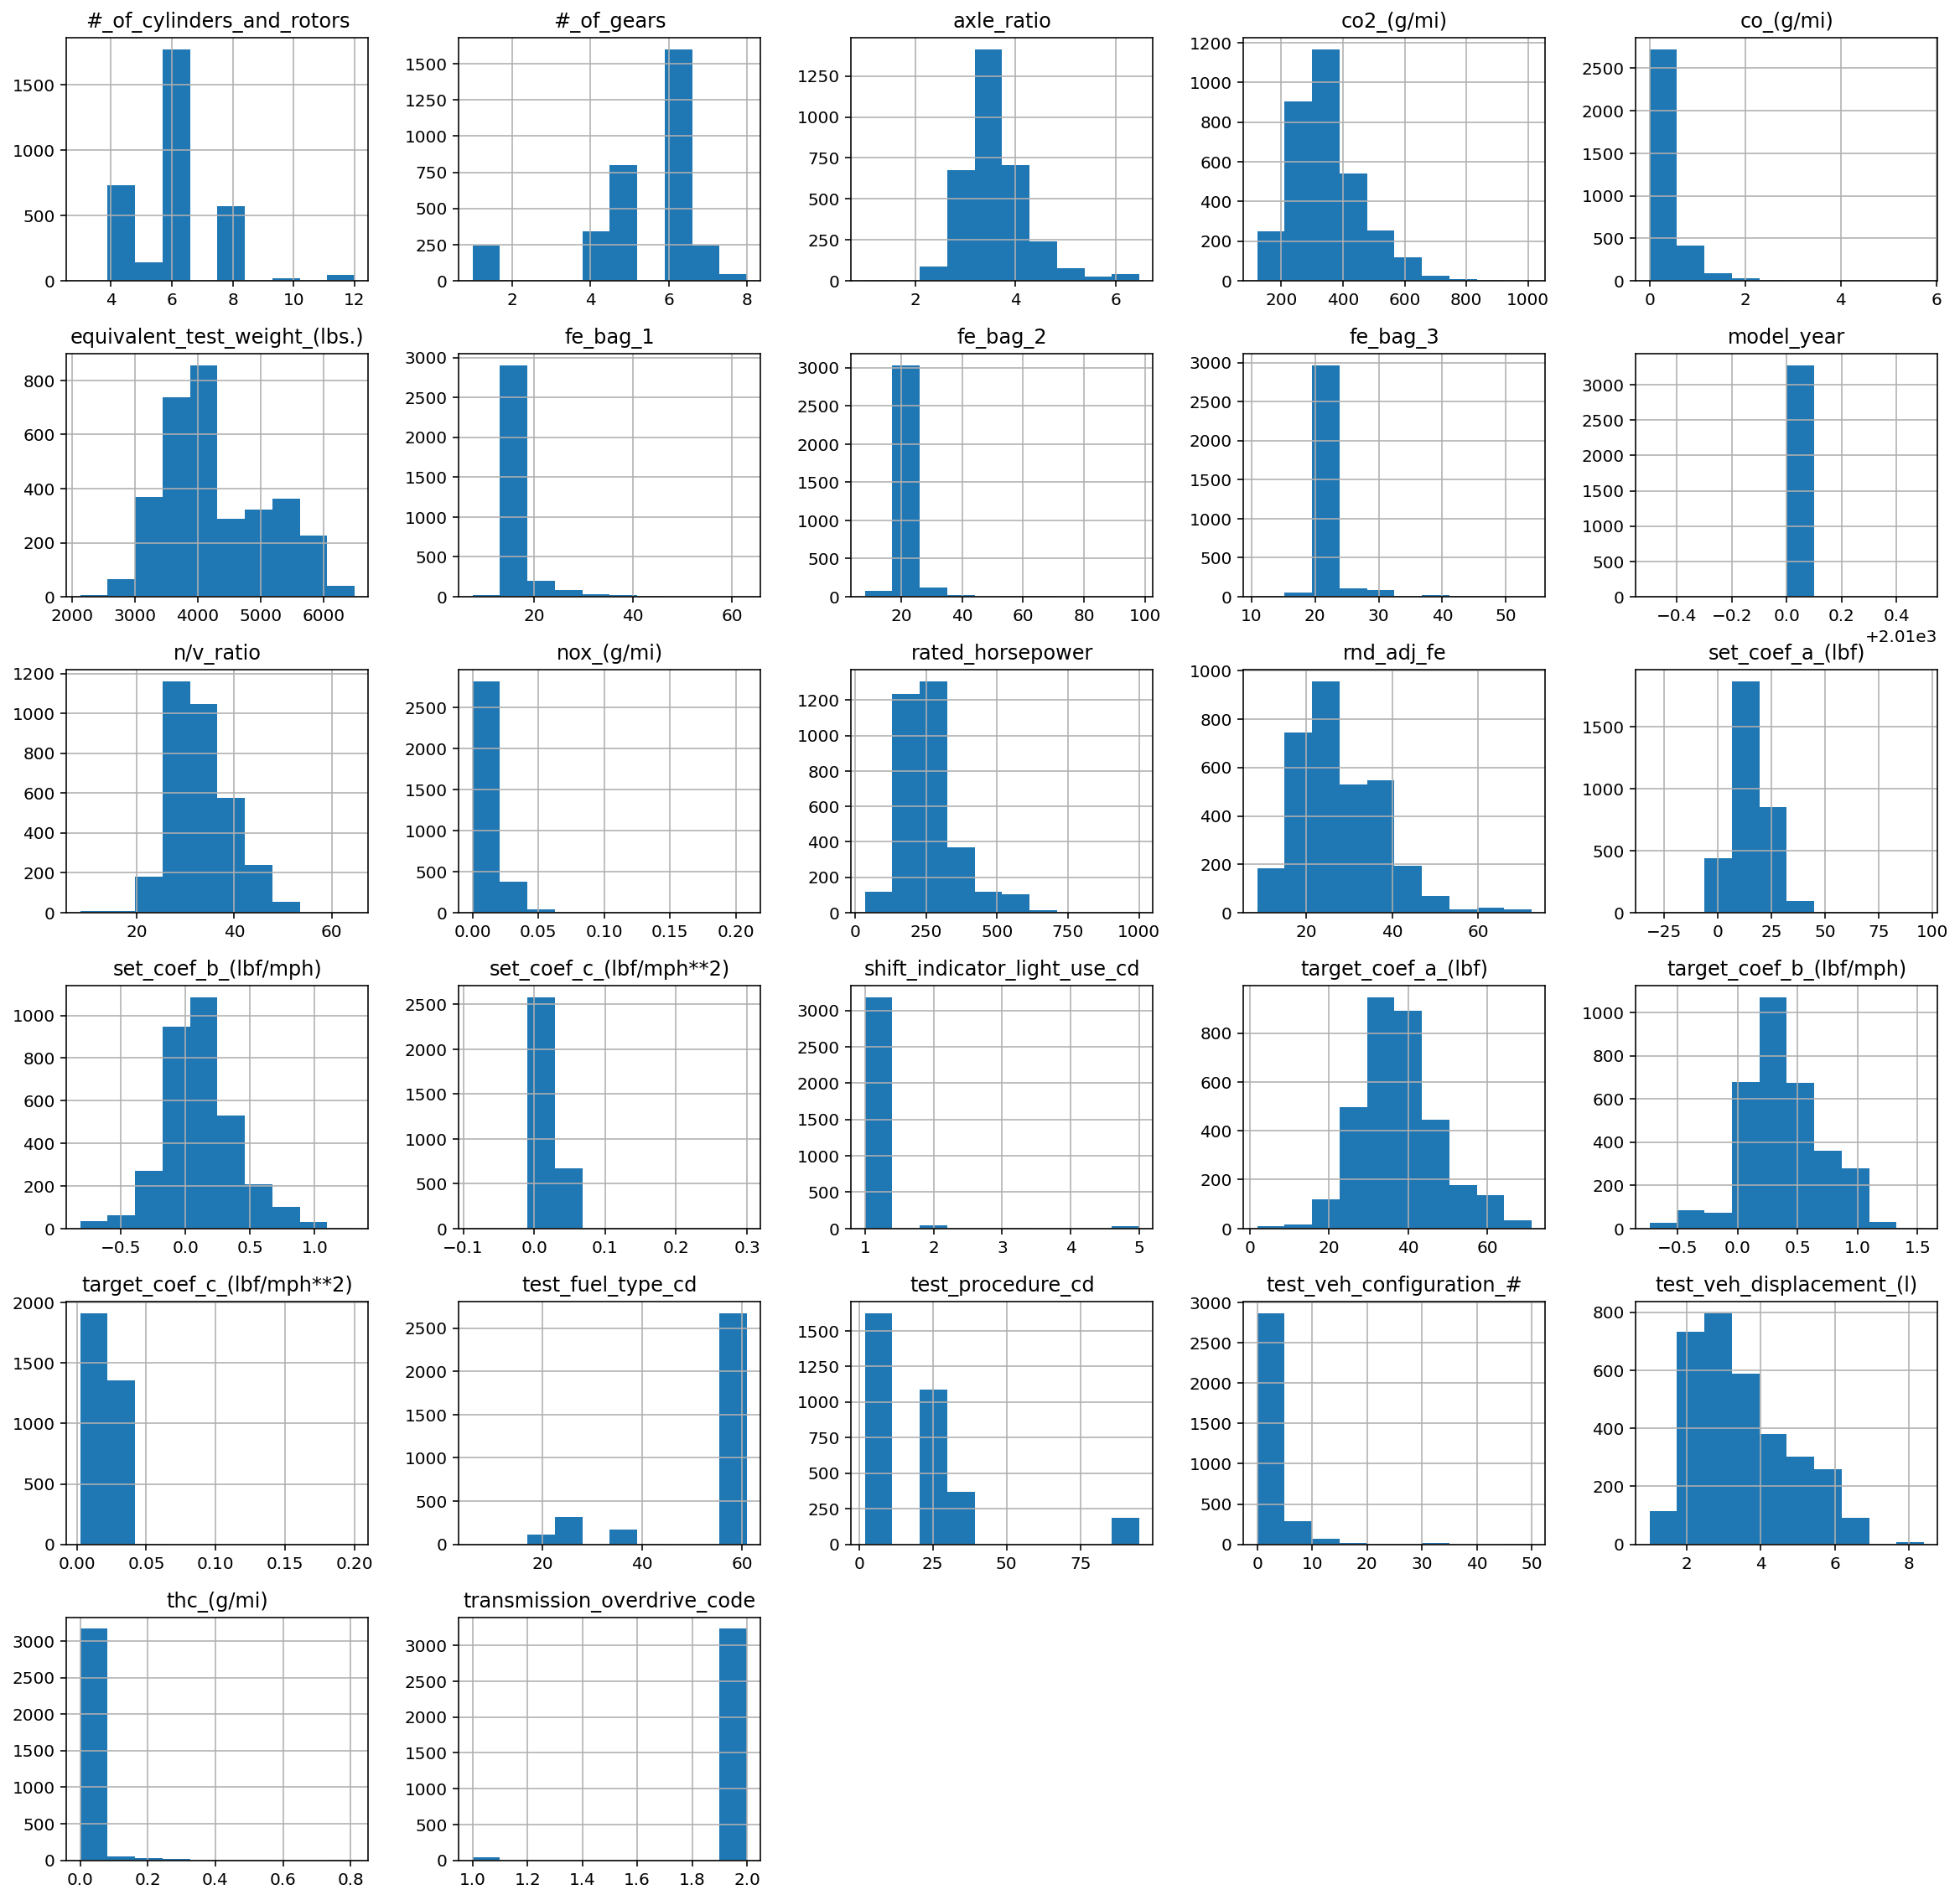

In [45]:
#all possible histograms of 2010 dataset
cdf_10.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3ED36B430>,
      dtype=object)

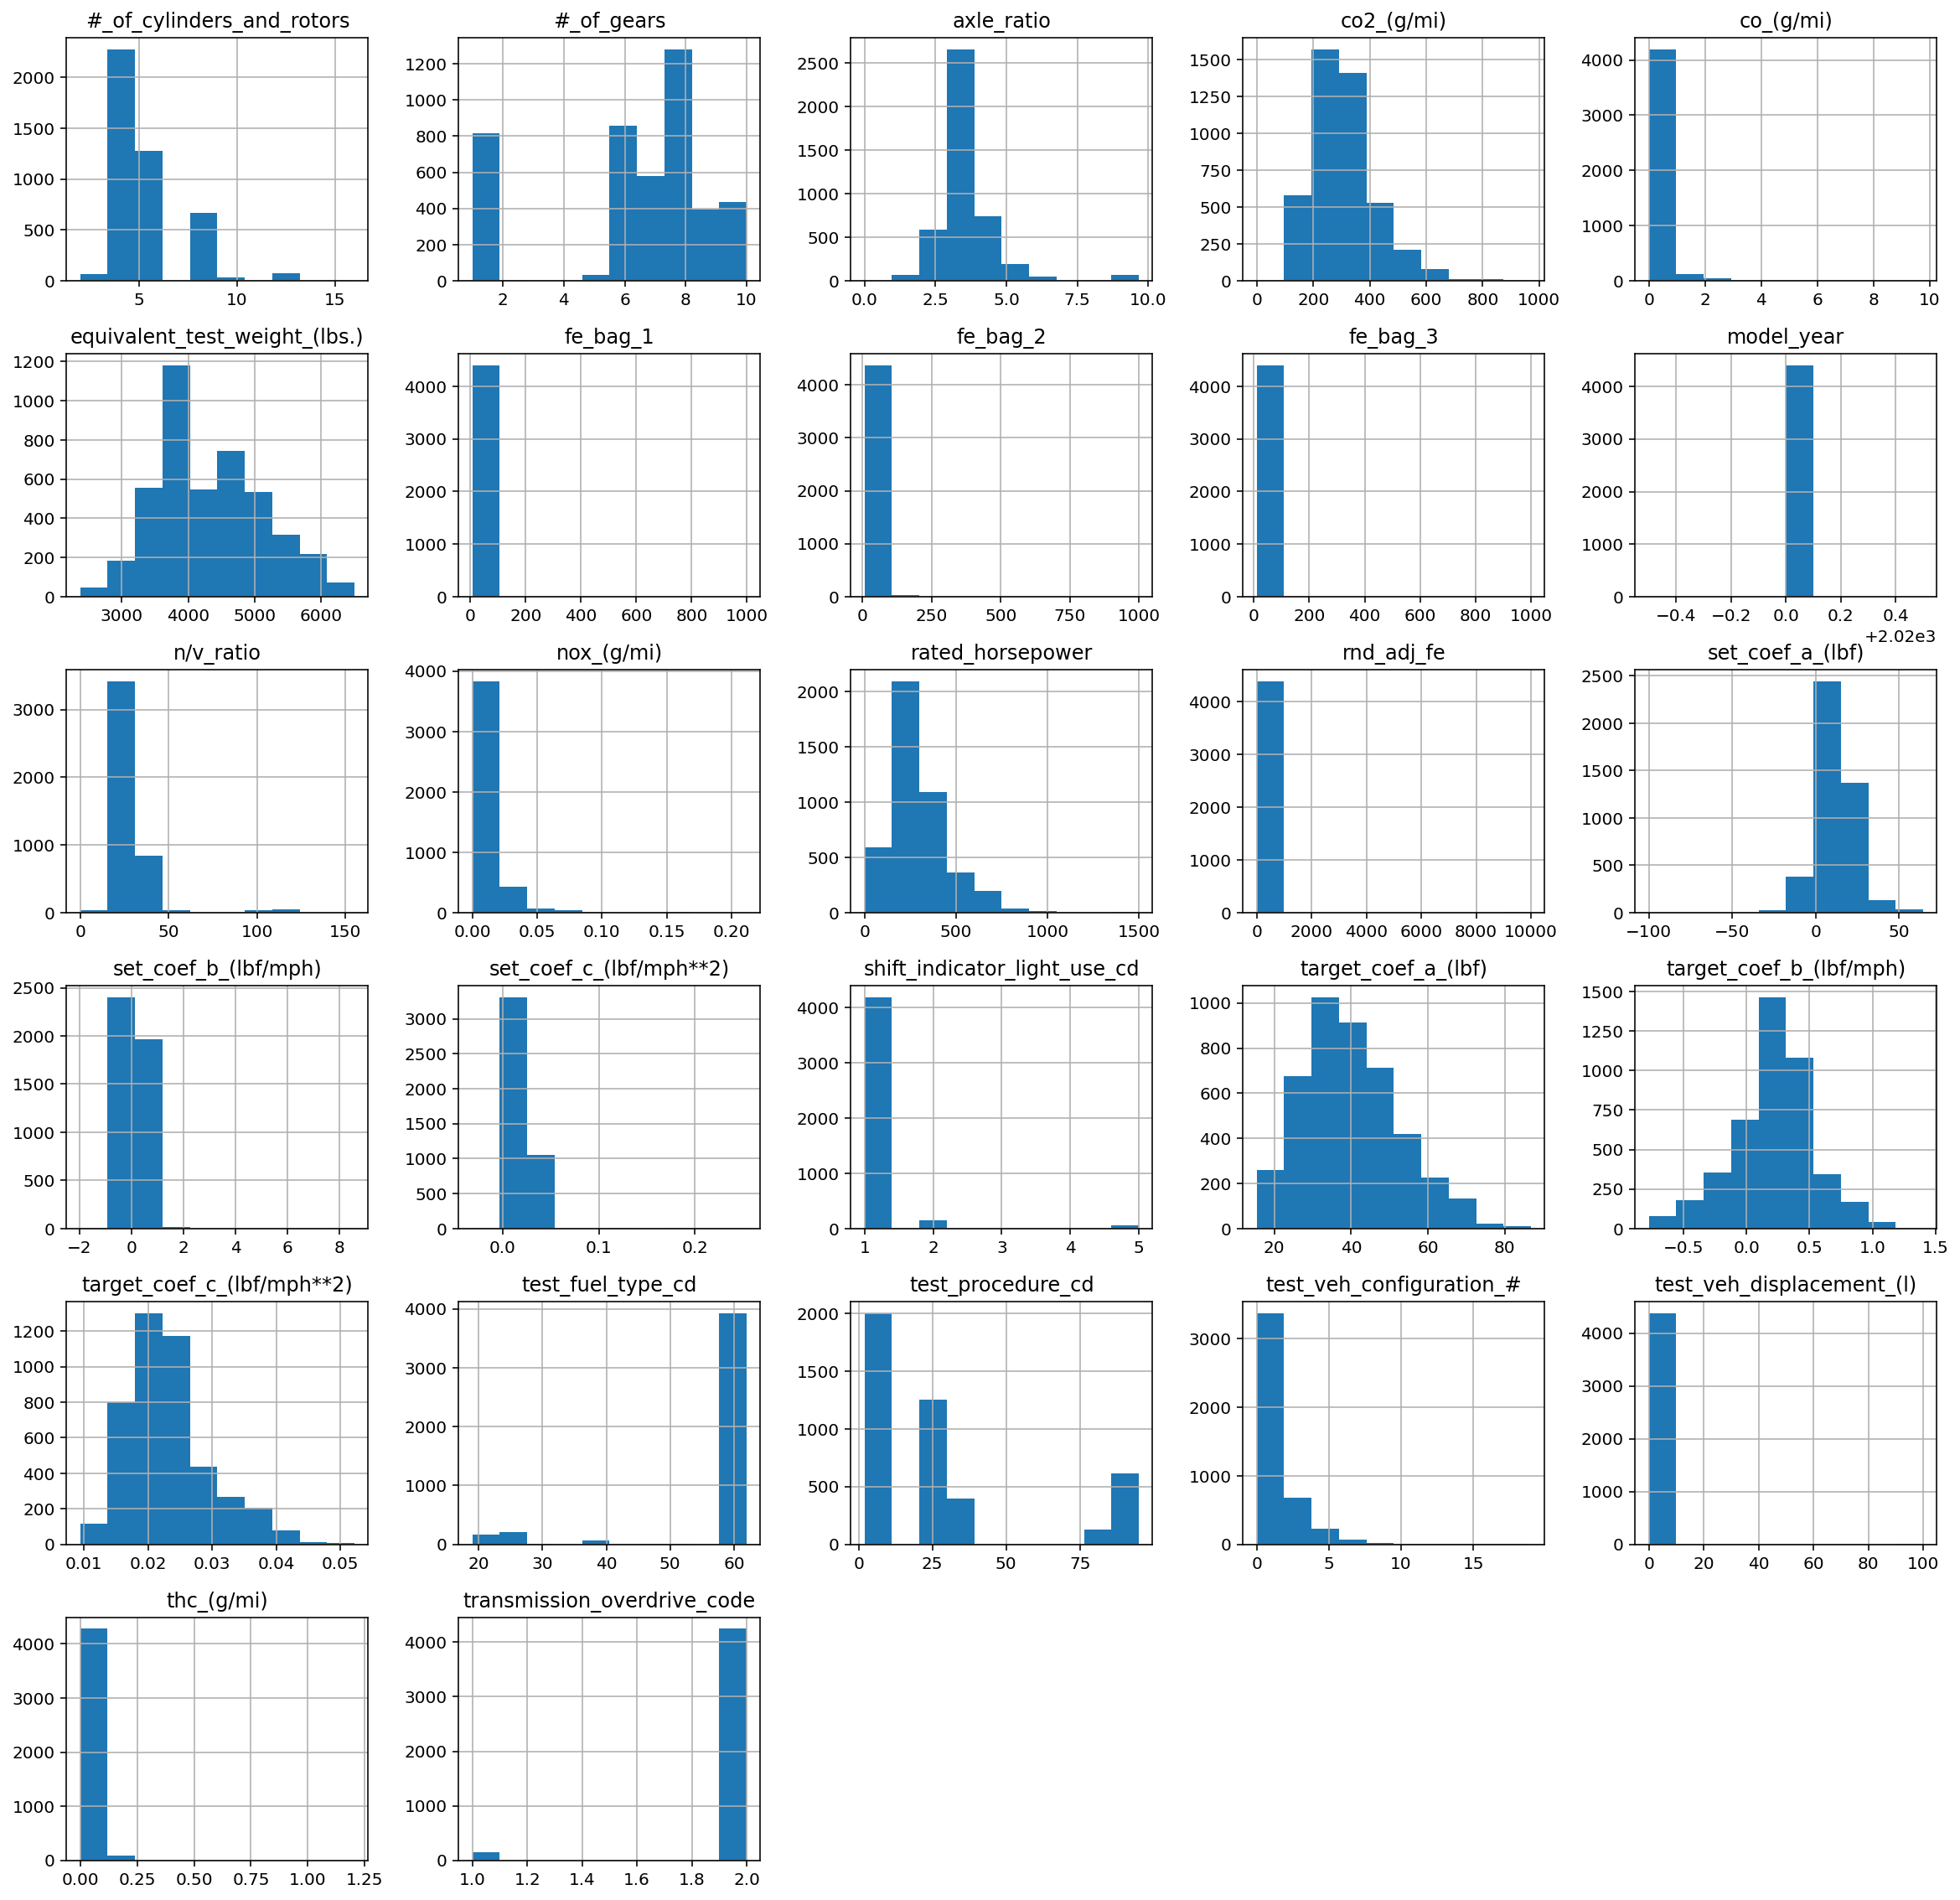

In [46]:
#all possible histograms of 2020 dataset
cdf_20.hist(figsize=(20,20))

Text(0.5, 1.0, 'The relationship between Axle ratio and Test Vehicle Displacement in 2010')

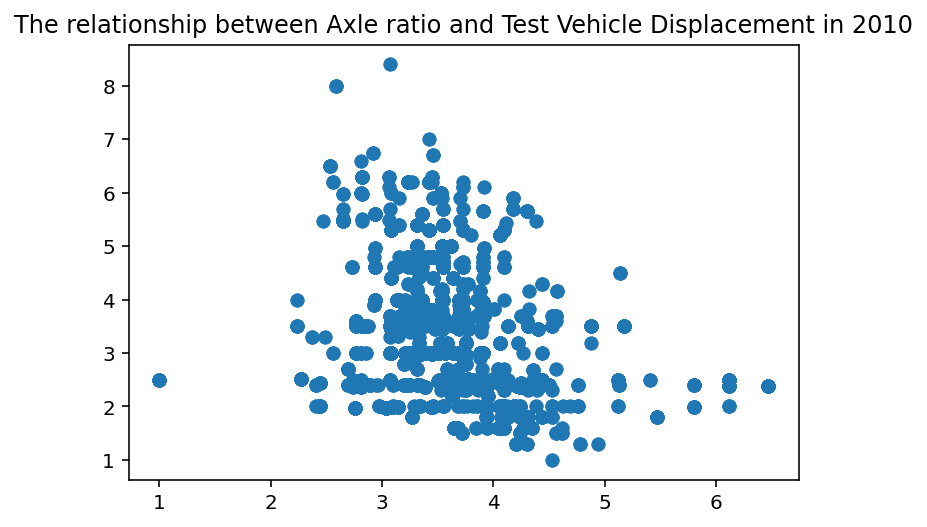

In [47]:
plt.scatter(data = cdf_10 , x='axle_ratio' , y = 'test_veh_displacement_(l)') ;
plt.title('The relationship between Axle ratio and Test Vehicle Displacement in 2010')


Text(0.5, 1.0, 'The relationship between Axle ratio and Test Vehicle Displacement in 2020')

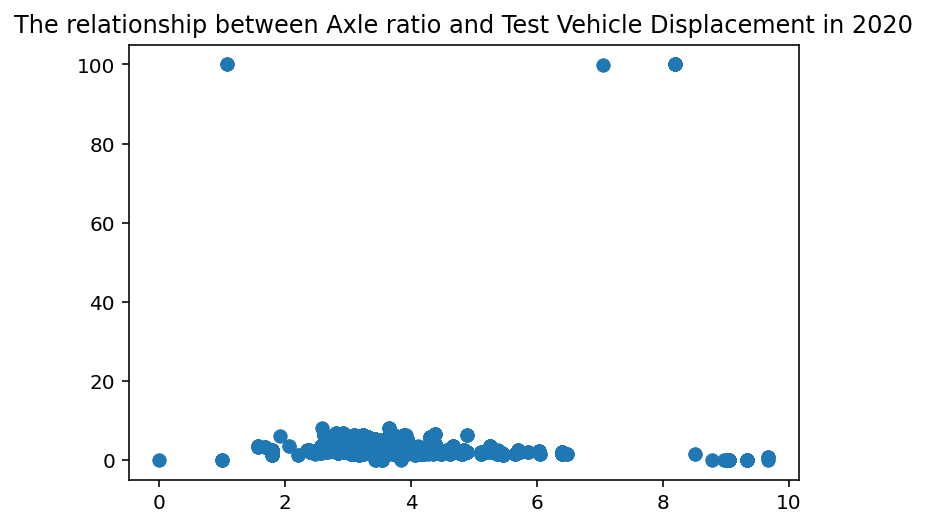

In [48]:
plt.scatter(data = cdf_20 , x='axle_ratio' , y = 'test_veh_displacement_(l)') ;
plt.title('The relationship between Axle ratio and Test Vehicle Displacement in 2020')

Text(0.5, 1.0, 'fe bag1 mpg against co2 score in 2010')

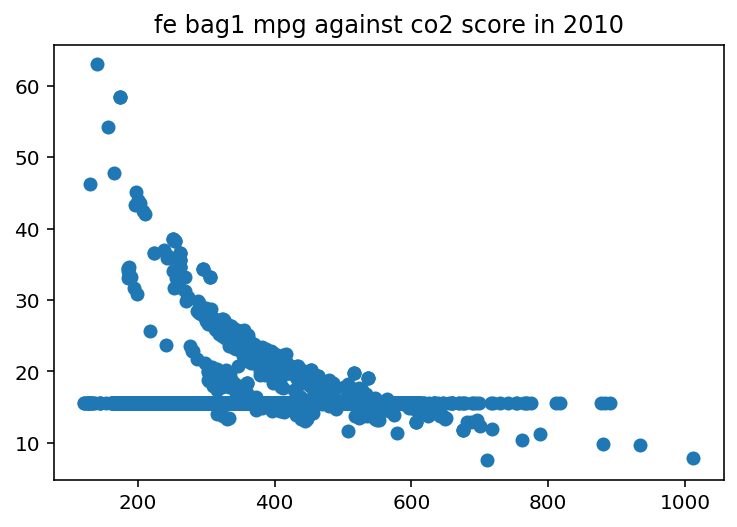

In [49]:
plt.scatter( data = cdf_10 , x='co2_(g/mi)' , y = 'fe_bag_1') ;
plt.title('fe bag1 mpg against co2 score in 2010')

Text(0.5, 1.0, 'fe bag1 mpg against co2 score in 2020')

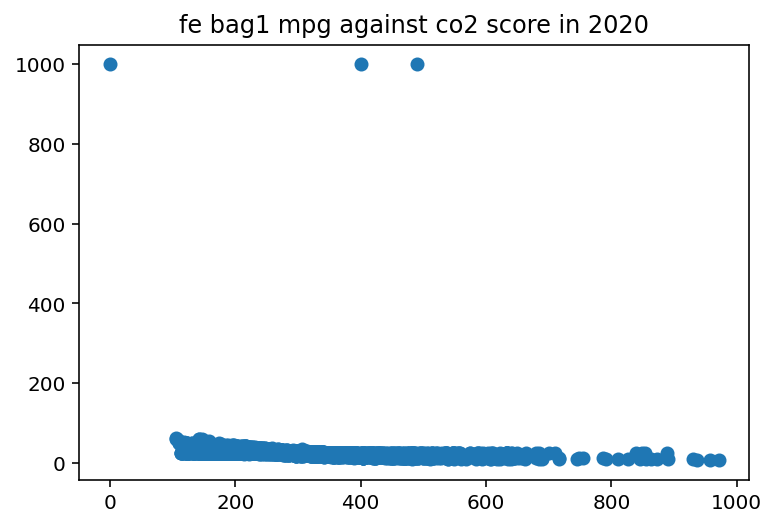

In [50]:
plt.scatter( data = cdf_20 , x='co2_(g/mi)' , y = 'fe_bag_1') ;
plt.title('fe bag1 mpg against co2 score in 2020')

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


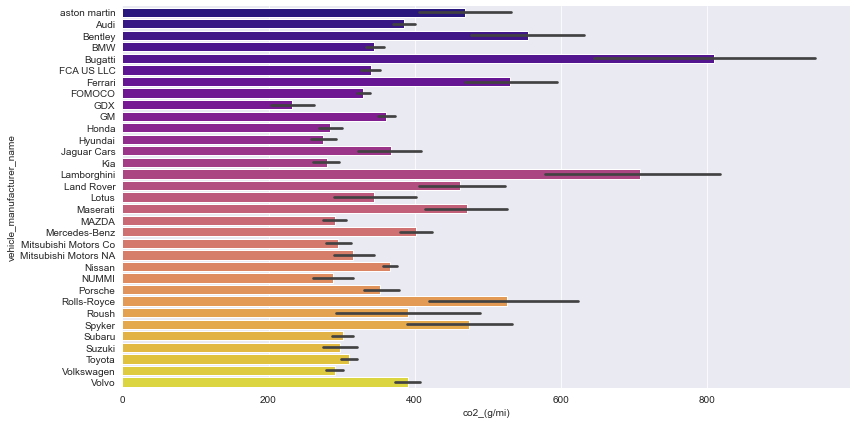

In [48]:
import seaborn as sns
from warnings import filterwarnings
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#read datasets for further visualization
cdf_10=pd.read_csv('Data/clean_10.csv')
cdf_20=pd.read_csv('Data/clean_20.csv')
sns.set_style('darkgrid')

import pylab as plt
import seaborn as sns

#default estimator mean
#plt.bar(cdf_10['vehicle_manufacturer_name'],cdf_10['co2_(g/mi)'],10)
sns.factorplot(x='co2_(g/mi)',y='vehicle_manufacturer_name',size=6,aspect=2,kind='bar',data=cdf_10,palette='plasma')
#bar plot of vehicle manufacturer name against co2 emission in 2010 dataset
#standard deviation
#sns.barplot(x='represented_test_veh_model',y='co2_(g/mi)',data=cdf_10,palette='plasma',estimator=np.std)

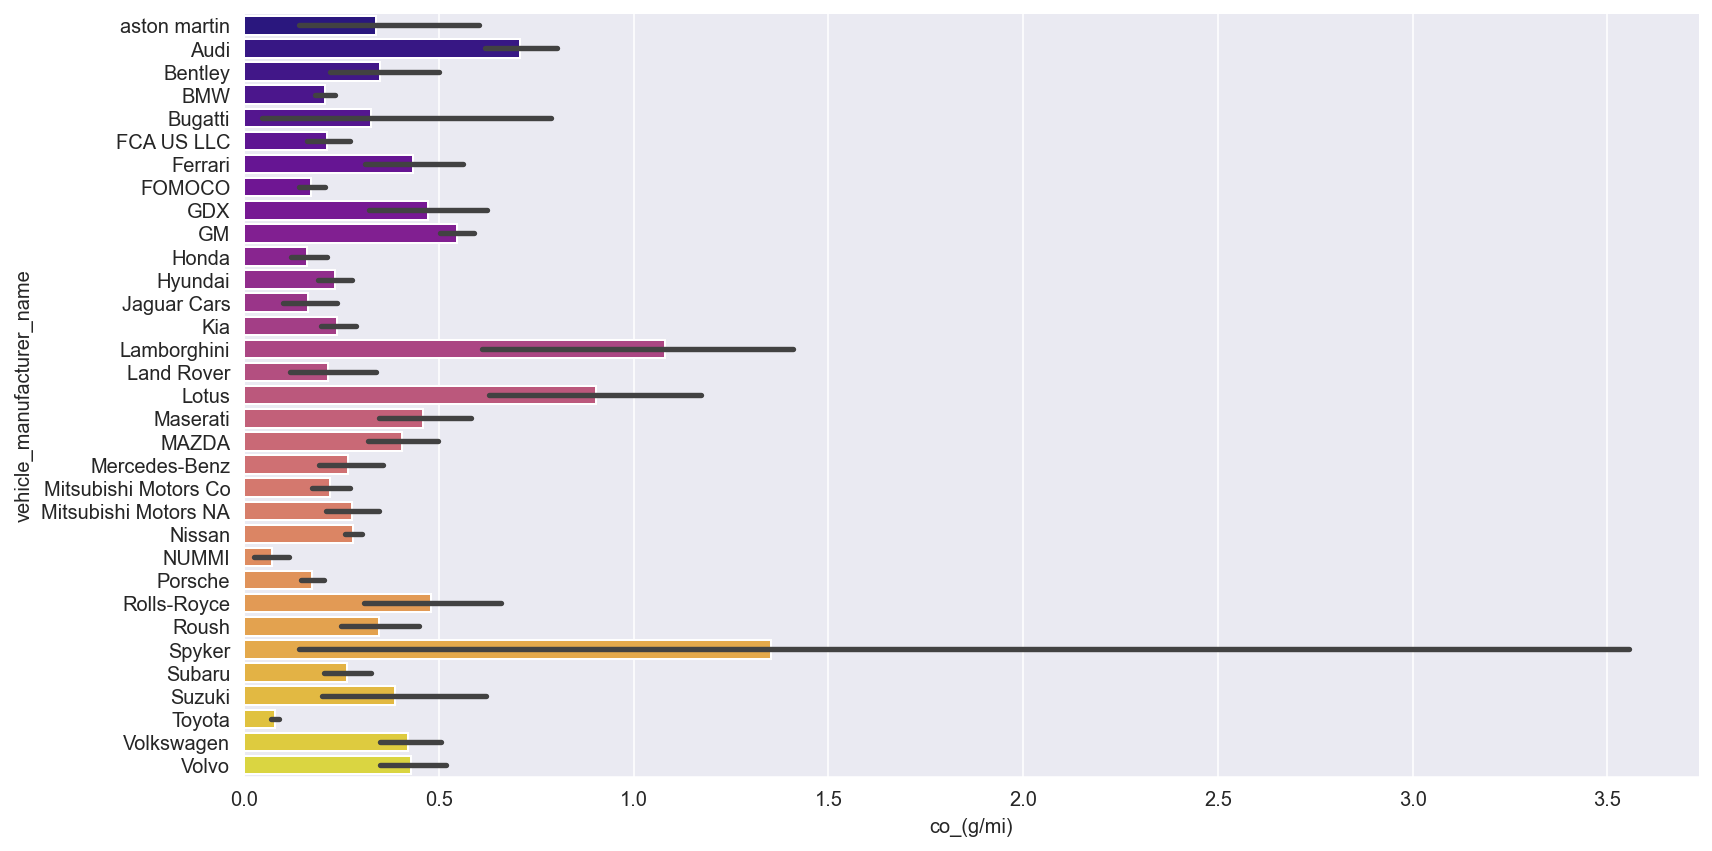

In [52]:
#bar plot of vehicle manufacturer name against co in 2010 dataset
sns.factorplot(x='co_(g/mi)',y='vehicle_manufacturer_name',size=6,aspect=2,kind='bar',data=cdf_10,palette='plasma')

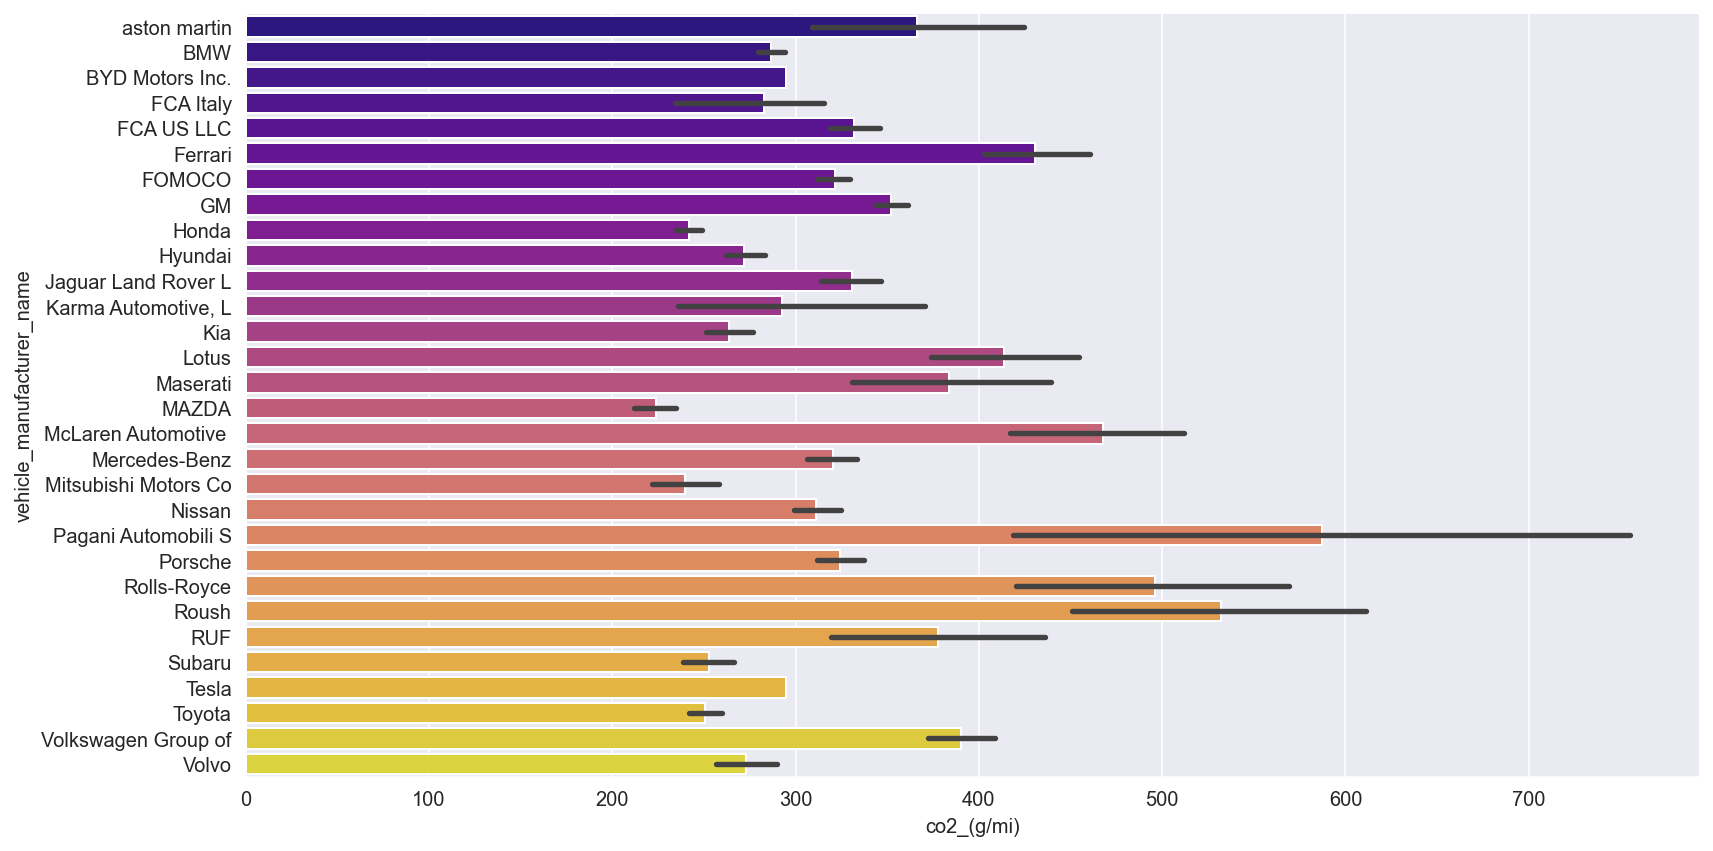

In [53]:
#bar plot of vehicle manufacturer name against co2 emission in 2020 dataset
sns.factorplot(x='co2_(g/mi)',y='vehicle_manufacturer_name',size=6,aspect=2,kind='bar',data=cdf_20,palette='plasma')


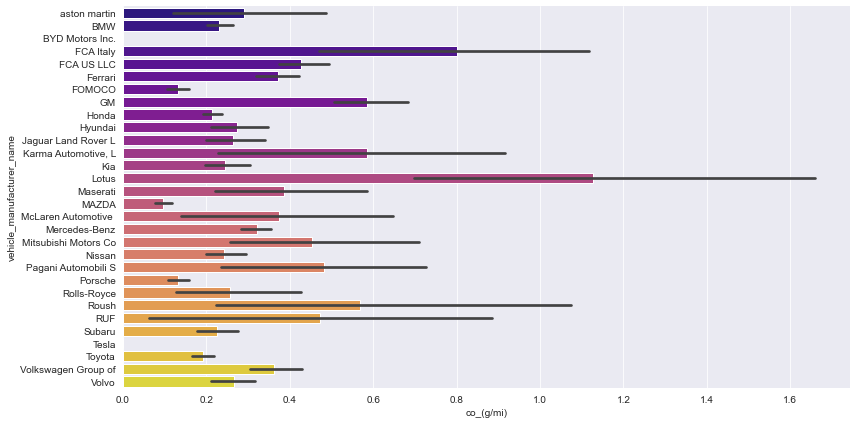

In [49]:
#bar plot of vehicle manufacturer name against co emission in 2020 dataset
sns.factorplot(x='co_(g/mi)',y='vehicle_manufacturer_name',size=6,aspect=2,kind='bar',data=cdf_20,palette='plasma')


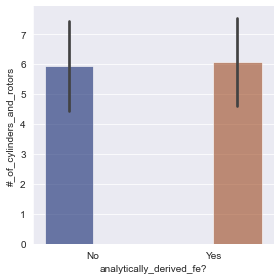

In [50]:
#bar plot of number of cylinders and rotors against analytically derived fe for 2010 dataset
g=sns.catplot(data=cdf_10,kind='bar',x="analytically_derived_fe?",y="#_of_cylinders_and_rotors",hue="analytically_derived_fe?",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("analytically_derived_fe?","#_of_cylinders_and_rotors")
#g.legend.set_title("")

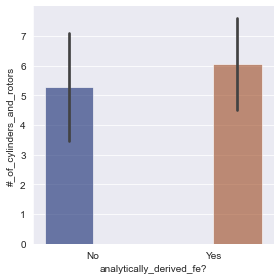

In [51]:
#bar plot of number of cylinders and rotors against analytically derived fe for 2020 dataset
g=sns.catplot(data=cdf_20,kind='bar',x="analytically_derived_fe?",y="#_of_cylinders_and_rotors",hue="analytically_derived_fe?",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("analytically_derived_fe?","#_of_cylinders_and_rotors")
#g.legend.set_title("")

vehicles with number of rotors and cylinders 2010


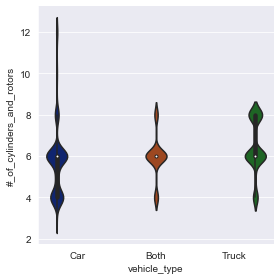

In [52]:
#violin plot of number of cylinders and rotors against vehicle type for 2010 dataset
g=sns.factorplot(data=cdf_10,kind='violin',x="vehicle_type",y="#_of_cylinders_and_rotors",hue="vehicle_type",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","#_of_cylinders_and_rotors")
#g.legend.set_title("vehicles with number of rotors and cylinders")
print("vehicles with number of rotors and cylinders 2010")

vehicles with number of rotors and cylinders 2020


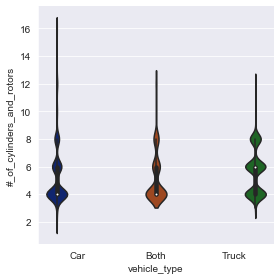

In [53]:
#violin plot of number of cylinders and rotors against vehicle type for 2020 dataset
g=sns.factorplot(data=cdf_20,kind='violin',x="vehicle_type",y="#_of_cylinders_and_rotors",hue="vehicle_type",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","#_of_cylinders_and_rotors")
#g.legend.set_title("vehicles with number of rotors and cylinders")
print("vehicles with number of rotors and cylinders 2020")

vehicles with amount of co2_(g/mi) 2010


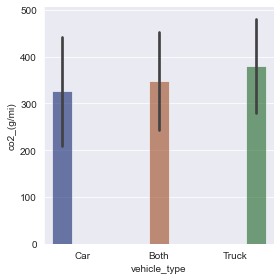

In [54]:
#bar plot of co2 production against vehicle type for 2010 dataset
g=sns.factorplot(data=cdf_10,kind='bar',x="vehicle_type",y="co2_(g/mi)",hue="vehicle_type",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","co2_(g/mi)")
#g.legend.set_title("vehicles with amount of co2_(g/mi)")
print("vehicles with amount of co2_(g/mi) 2010")

vehicles with amount of co2_(g/mi) 2020


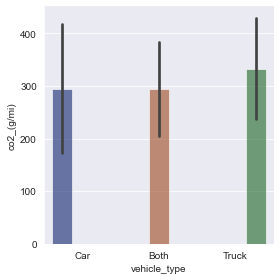

In [55]:
#bar plot of co2 production against vehicle type for 2020 dataset
g=sns.factorplot(data=cdf_20,kind='bar',x="vehicle_type",y="co2_(g/mi)",hue="vehicle_type",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","co2_(g/mi)")
#g.legend.set_title("vehicles with amount of co2_(g/mi)")
print("vehicles with amount of co2_(g/mi) 2020")

vehicles with amount of co_(g/mi) 2010


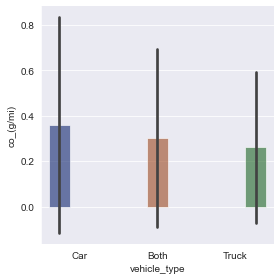

In [56]:
#bar plot of co production against vehicle type for 2010 dataset
g=sns.factorplot(data=cdf_10,kind='bar',x="vehicle_type",y="co_(g/mi)",hue="vehicle_type",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","co_(g/mi)")
#g.legend.set_title("vehicles with amount of co_(g/mi)")
print("vehicles with amount of co_(g/mi) 2010")

vehicles with amount of co_(g/mi) 2020


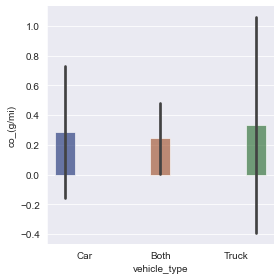

In [57]:
#bar plot of co production against vehicle type for 2020 dataset
g=sns.factorplot(data=cdf_20,kind='bar',x="vehicle_type",y="co_(g/mi)",hue="vehicle_type",ci="sd",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","co_(g/mi)")
#g.legend.set_title("vehicles with amount of co_(g/mi)")
print("vehicles with amount of co_(g/mi) 2020")

Text(0.5, 1.05, "Correlation of 2020 models' features")

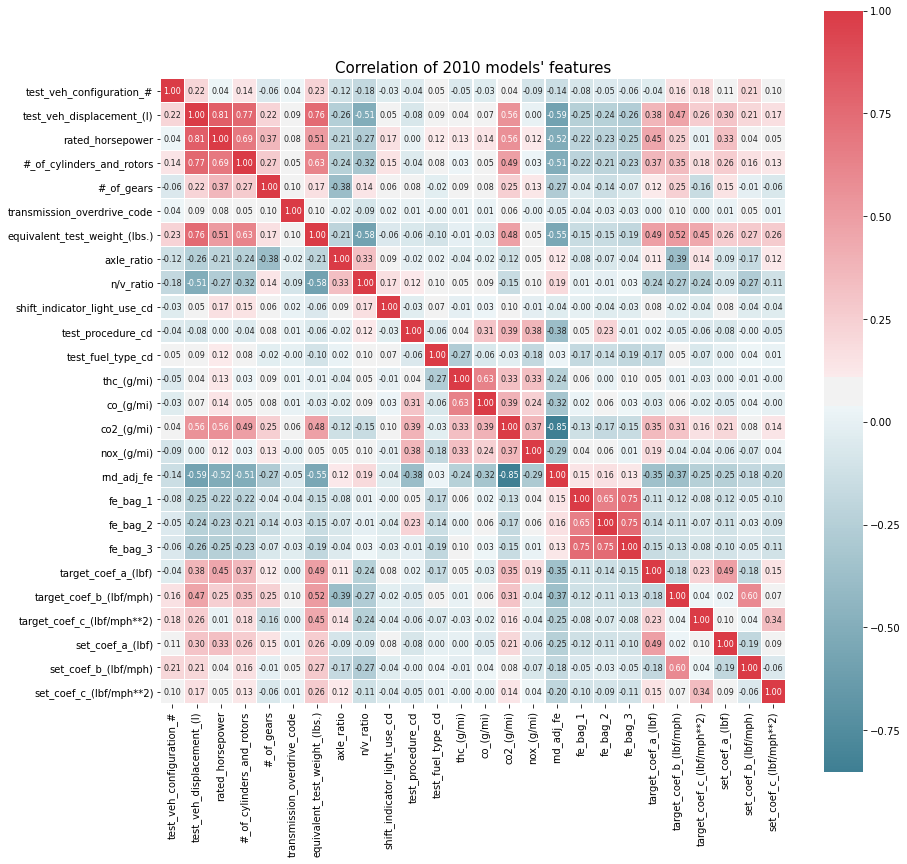

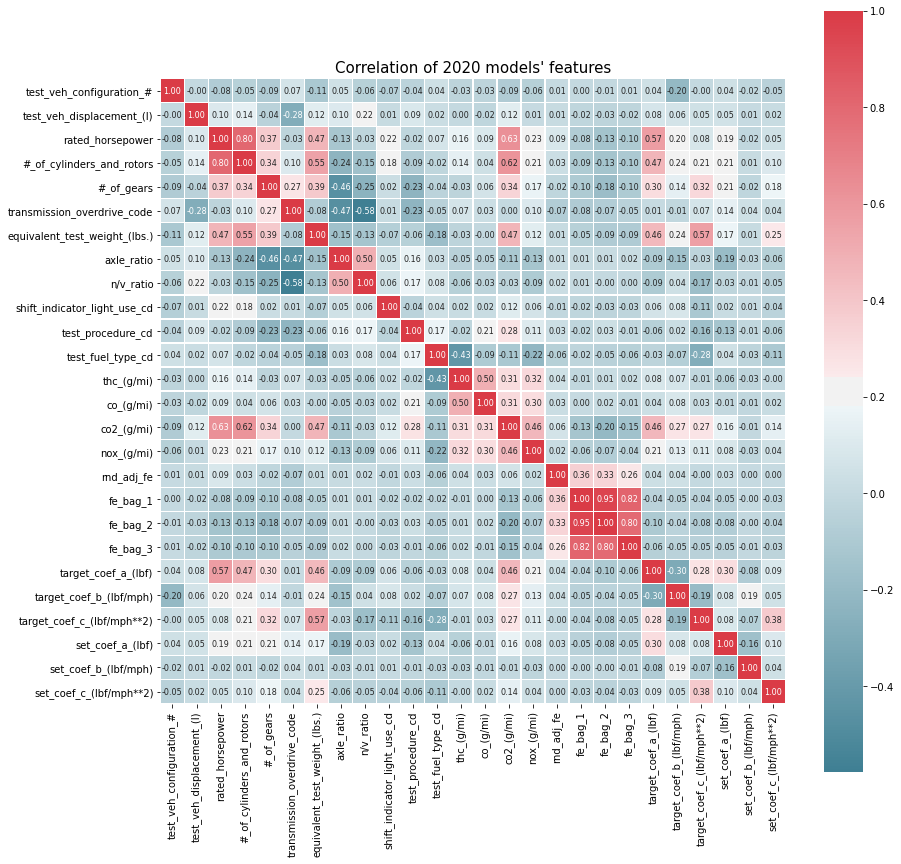

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import json
import re
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#hiding warnings for clean display
warnings.filterwarnings('ignore')

cdf_10=pd.read_csv('Data/clean_10.csv')
cdf_20=pd.read_csv('Data/clean_20.csv')
#def reshaped(excel_obj,i):
#to drop column video removed or error
#sns.countplot(cdf_10['Result'],label="Count")

corr = cdf_10.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.2, linecolor='white')
plt.title("Correlation of 2010 models' features", y=1.05, size=15)  

corr = cdf_20.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.2, linecolor='white')
plt.title("Correlation of 2020 models' features", y=1.05, size=15)  

Text(0.5, 1.0, 'rated horsepower against co2 score')

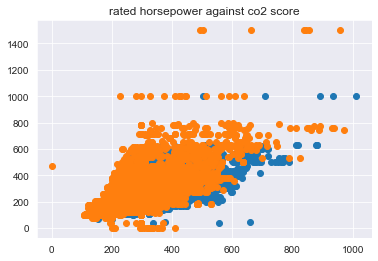

In [58]:
plt.scatter( data = cdf_10 , x='co2_(g/mi)' , y = 'rated_horsepower') ;
#plt.title('rated horsepower against co2 score in 2010')
plt.scatter( data = cdf_20 , x='co2_(g/mi)' , y = 'rated_horsepower') ;
plt.title('rated horsepower against co2 score')

Text(0.5, 1.0, 'vehicle displacement against co2 score')

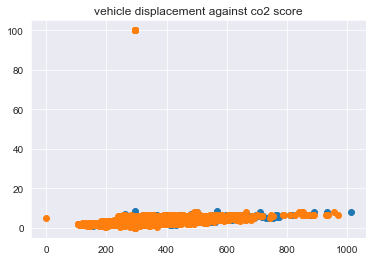

In [59]:
plt.scatter( data = cdf_10 , x='co2_(g/mi)' , y = 'test_veh_displacement_(l)') ;
#plt.title('rated horsepower against co2 score in 2010')
plt.scatter( data = cdf_20 , x='co2_(g/mi)' , y = 'test_veh_displacement_(l)') ;
plt.title('vehicle displacement against co2 score')

Text(0.5, 1.0, 'rated horsepower against test_veh_displacement_(l) in 2010')

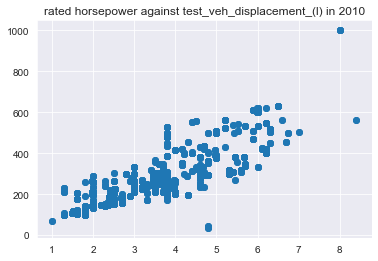

In [60]:
plt.scatter( data = cdf_10 , x='test_veh_displacement_(l)' , y = 'rated_horsepower') ;
plt.title('rated horsepower against test_veh_displacement_(l) in 2010')

Text(0.5, 1.0, 'rated horsepower against test_veh_displacement_(l) 2020')

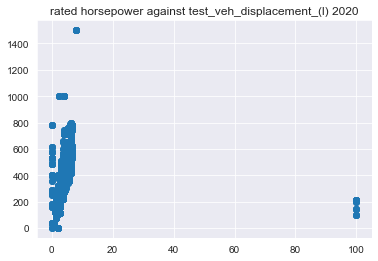

In [61]:
plt.scatter( data = cdf_20 , x='test_veh_displacement_(l)' , y = 'rated_horsepower') ;
plt.title('rated horsepower against test_veh_displacement_(l) 2020')

In [1]:
#prediction algorithm
import pandas as pd
cdf_10=pd.read_csv('Data/clean_10.csv')
cdf_20=pd.read_csv('Data/clean_20.csv')
#cleaned 2010 dataset
cdf_10

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.900,9ASXV05.9VH1,Car,...,0.8444,0.01190,19.11,0.4320,0.01470,TWC,Three-way catalyst,N,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.900,9ASXV05.9VH1,Car,...,0.8444,0.01190,19.11,0.4320,0.01470,TWC,Three-way catalyst,N,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.900,AASXV05.9VH1,Car,...,0.8444,0.01190,2.23,0.6948,0.01300,TWC,Three-way catalyst,N,N,No averaging
3,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.900,AASXV05.9VH1,Car,...,0.8444,0.01190,2.23,0.6948,0.01300,TWC,Three-way catalyst,N,N,No averaging
4,2010,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.900,9ASXV05.9VH1,Car,...,0.7502,0.01630,17.40,0.2270,0.02090,TWC,Three-way catalyst,N,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,2010,Volvo,VVX,Volvo,XC90 FWD,200904,2,3.192,AVVXJ03.2U2N,Both,...,0.1783,0.02663,22.50,0.1590,0.30000,TWC,Three-way catalyst,N,N,No averaging
3270,2010,Volvo,VVX,Volvo,XC90 FWD,200904,2,3.192,AVVXJ03.2U2N,Both,...,0.1783,0.02663,20.14,0.1276,0.02674,TWC,Three-way catalyst,N,N,No averaging
3271,2010,Volvo,VVX,Volvo,XC90 FWD,200904,2,3.192,AVVXJ03.2U2N,Both,...,0.1783,0.02663,20.14,0.1276,0.02674,TWC,Three-way catalyst,N,N,No averaging
3272,2010,Volvo,VVX,Volvo,XC90 V8 AWD,200713,2,4.414,AVVXJ04.4U2N,Both,...,0.1588,0.02615,29.65,-0.0549,0.02725,TWC,Three-way catalyst,N,N,No averaging


In [20]:
#setting up dependent and independent variables
#X=pd.DataFrame(cdf_10['test_veh_displacement_(l)'],cdf_10['target_coef_a_(lbf)'],cdf_10['target_coef_b_(lbf/mph)'],cdf_10['target_coef_c_(lbf/mph**2)'],cdf_10['set_coef_a_(lbf)'],cdf_10['set_coef_b_(lbf/mph)'],cdf_10['set_coef_c_(lbf/mph**2)'],cdf_10['rated_horsepower'],cdf_10['#_of_cylinders_and_rotors'],cdf_10['#_of_gears'],cdf_10['axle_ratio'],cdf_10['n/v_ratio'],cdf_10['equivalent_test_weight_(lbs.)'])
#y=pd.DataFrame(cdf_10['fe_bag_1'])

In [40]:
#summary statistics of 2010 dataset
cdf_10.describe()

,model_year,test_veh_configuration_#,test_veh_displacement_(l),rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,rnd_adj_fe,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2)
count,3274.0,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,...,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000,3274.000000
mean,2010.0,2.100794,3.474149,264.040929,5.963653,5.281002,1.986866,4274.034820,3.620070,32.957361,...,27.803054,16.566020,19.688358,21.901328,37.707815,0.383023,0.022329,15.506116,0.116006,0.023741
std,0.0,4.069092,1.293476,107.443427,1.493511,1.460288,0.113865,855.828299,0.647879,6.022515,...,9.686059,3.864272,4.282842,2.898102,9.895318,0.332385,0.007767,8.993480,0.279223,0.014706
min,2010.0,0.000000,0.999000,35.000000,3.000000,1.000000,1.000000,2125.000000,1.000000,8.400000,...,8.700000,7.600000,8.200000,10.900000,1.843000,-0.735900,0.002480,-31.798000,-0.813000,-0.086800
25%,2010.0,0.000000,2.400000,175.000000,5.000000,5.000000,2.000000,3625.000000,3.230000,28.600000,...,20.600000,15.500000,18.800000,21.300000,30.386250,0.162370,0.017530,9.930000,-0.057877,0.018500
50%,2010.0,1.000000,3.195000,255.000000,6.000000,6.000000,2.000000,4000.000000,3.540000,32.000000,...,26.100000,15.500000,18.800000,21.300000,36.918000,0.341830,0.020297,14.850000,0.090360,0.021382
75%,2010.0,2.000000,4.300000,314.000000,6.000000,6.000000,2.000000,4750.000000,3.910000,37.100000,...,34.500000,15.500000,18.800000,21.300000,43.352500,0.581400,0.026160,20.600000,0.263000,0.027560
max,2010.0,50.000000,8.400000,1001.000000,12.000000,8.000000,2.000000,6500.000000,6.470000,64.700000,...,72.400000,63.001570,98.024062,54.080187,71.280000,1.553100,0.200000,96.000000,1.310000,0.300000


In [2]:
cdf_20.describe()

,model_year,test_veh_configuration_#,test_veh_displacement_(l),rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,rnd_adj_fe,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2)
count,4400.0,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,...,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,2020.0,1.069545,3.279156,298.327955,5.360682,6.438409,1.964773,4340.653409,3.653741,29.069500,...,68.029636,24.870288,29.565862,28.806026,39.959010,0.215611,0.023200,12.178500,0.131216,0.023010
std,0.0,1.727433,6.339088,158.228990,1.808054,2.854799,0.184375,830.039904,1.040273,12.958519,...,565.772533,26.044873,27.852712,21.376582,12.526984,0.316151,0.006618,11.693722,0.359554,0.015289
min,2020.0,0.000000,0.001000,1.000000,2.000000,1.000000,1.000000,2375.000000,0.000000,0.000000,...,0.000000,7.600000,8.300000,11.300000,15.431000,-0.777300,0.009400,-99.900000,-1.975200,-0.031400
25%,2020.0,0.000000,2.000000,181.000000,4.000000,6.000000,2.000000,3750.000000,3.150000,24.000000,...,24.500000,24.006000,26.663000,27.600000,30.700000,0.045240,0.018566,5.870000,-0.006200,0.017390
50%,2020.0,0.000000,2.500000,272.000000,4.000000,7.000000,2.000000,4250.000000,3.450000,26.300000,...,31.100000,24.100000,27.900000,27.600000,38.680000,0.242090,0.022150,11.615000,0.112490,0.021000
75%,2020.0,1.000000,3.500000,362.000000,6.000000,8.000000,2.000000,5000.000000,3.810000,30.000000,...,40.900000,24.100000,27.900000,27.600000,47.900000,0.404700,0.026202,18.460000,0.237450,0.025534
max,2020.0,19.000000,99.999000,1500.000000,16.000000,10.000000,2.000000,6500.000000,9.670000,155.100000,...,10000.000000,999.000000,999.000000,999.000000,86.799000,1.403000,0.052210,64.520000,8.580000,0.253860


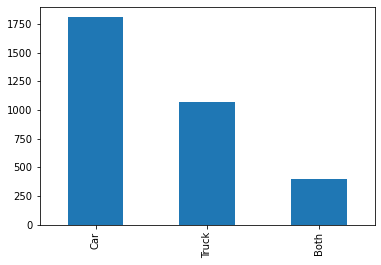

In [41]:
#count of vehicles of each type
pd.value_counts(cdf_10['vehicle_type']).plot.bar()

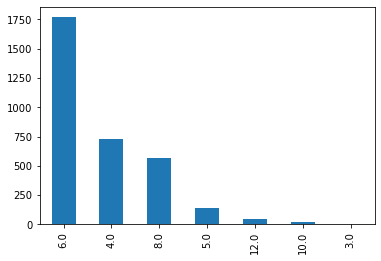

In [42]:
#count of number of cylinders and rotors
pd.value_counts(cdf_10['#_of_cylinders_and_rotors']).plot.bar()

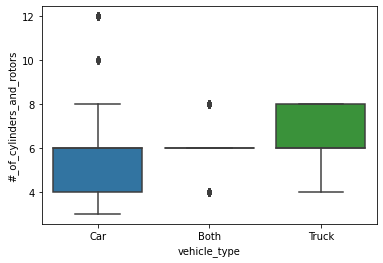

In [43]:
import seaborn as sns
#boxplot of vehicle type against number of cylinders and rotors of 2010 dataset
sns.boxplot(x='vehicle_type',y='#_of_cylinders_and_rotors',data=cdf_10)

In [3]:
data=cdf_10

In [4]:
data.drop(['model_year','vehicle_manufacturer_name','veh_mfr_code','represented_test_veh_make','represented_test_veh_model','test_vehicle_id','actual_tested_testgroup','engine_code','tested_transmission_type_code','tested_transmission_type','transmission_lockup?','drive_system_code','drive_system_description','transmission_overdrive_desc','shift_indicator_light_use_desc','test_number','test_originator','analytically_derived_fe?','test_procedure_description','test_fuel_type_description','test_category','aftertreatment_device_cd','aftertreatment_device_desc','police_-_emergency_vehicle?','averaging_method_cd'],axis=1,inplace=True)

In [5]:
#prepare the 2010 dataset for modelling
data

,test_veh_configuration_#,test_veh_displacement_(l),vehicle_type,rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),averging_method_desc
0,0,5.900,Car,470,6.0,6,2,4500,3.54,34.9,...,13.3800,12.8800,16.2600,39.50,0.8444,0.01190,19.11,0.4320,0.01470,No averaging
1,0,5.900,Car,470,6.0,6,2,4500,3.54,34.9,...,15.5000,18.8000,21.3000,39.50,0.8444,0.01190,19.11,0.4320,0.01470,No averaging
2,0,5.900,Car,470,12.0,6,2,4500,3.15,28.6,...,16.2600,14.7600,19.3000,39.50,0.8444,0.01190,2.23,0.6948,0.01300,No averaging
3,0,5.900,Car,470,12.0,6,2,4500,3.15,28.6,...,15.5000,18.8000,21.3000,39.50,0.8444,0.01190,2.23,0.6948,0.01300,No averaging
4,0,5.900,Car,510,6.0,6,2,4500,3.46,31.2,...,14.4800,13.2800,17.1500,43.17,0.7502,0.01630,17.40,0.2270,0.02090,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,2,3.192,Both,235,6.0,6,2,5000,4.06,33.3,...,13.9700,16.3000,19.3100,57.97,0.1783,0.02663,22.50,0.1590,0.30000,No averaging
3270,2,3.192,Both,235,6.0,6,2,5000,4.06,33.3,...,18.3226,17.7487,21.0546,57.97,0.1783,0.02663,20.14,0.1276,0.02674,No averaging
3271,2,3.192,Both,235,6.0,6,2,5000,4.06,33.3,...,15.5000,18.8000,21.3000,57.97,0.1783,0.02663,20.14,0.1276,0.02674,No averaging
3272,2,4.414,Both,311,8.0,6,2,5250,3.33,27.3,...,15.5000,18.8000,21.3000,65.16,0.1588,0.02615,29.65,-0.0549,0.02725,No averaging


In [6]:
#count of type of vehicles 
data['vehicle_type'].value_counts()

Car      1806
Truck    1067
Both      401
Name: vehicle_type, dtype: int64

In [7]:
#count of averaging method descending
data['averging_method_desc'].value_counts()

No averaging                                              3206
Harmonic averaging (1/(Sum(i=1 to n) (FET(i) / WT(i)))      48
Simple averaging (Sum(i=1 to n) (FET(i)  *  WT(i)))         20
Name: averging_method_desc, dtype: int64

In [8]:
#mpg count
data['fe_unit'].value_counts()

MPG    3274
Name: fe_unit, dtype: int64

In [9]:
#drop fe_unit column 
data.drop(['fe_unit'],axis=1,inplace=True)

In [10]:
#updates list of columns
data.columns

Index(['test_veh_configuration_#', 'test_veh_displacement_(l)', 'vehicle_type',
       'rated_horsepower', '#_of_cylinders_and_rotors', '#_of_gears',
       'transmission_overdrive_code', 'equivalent_test_weight_(lbs.)',
       'axle_ratio', 'n/v_ratio', 'shift_indicator_light_use_cd',
       'test_procedure_cd', 'test_fuel_type_cd', 'thc_(g/mi)', 'co_(g/mi)',
       'co2_(g/mi)', 'nox_(g/mi)', 'rnd_adj_fe', 'fe_bag_1', 'fe_bag_2',
       'fe_bag_3', 'target_coef_a_(lbf)', 'target_coef_b_(lbf/mph)',
       'target_coef_c_(lbf/mph**2)', 'set_coef_a_(lbf)',
       'set_coef_b_(lbf/mph)', 'set_coef_c_(lbf/mph**2)',
       'averging_method_desc'],
      dtype='object')

In [11]:
#replacing the categorical values with integer substitutes
cleanup_data={"vehicle_type":{"Car":1,"Truck":2,"Both":3},"averging_method_desc":{"No averaging":0,"Harmonic averaging (1/(Sum(i=1 to n) (FET(i) / WT(i)))":1,"Simple averaging (Sum(i=1 to n) (FET(i)  *  WT(i))) ":2}}

In [12]:
#replacing the categorical values with integer substitutes
data.replace(cleanup_data,inplace=True)
data.head()

,test_veh_configuration_#,test_veh_displacement_(l),vehicle_type,rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),averging_method_desc
0,0,5.9,1,470,6.0,6,2,4500,3.54,34.9,...,13.38,12.88,16.26,39.50,0.8444,0.0119,19.11,0.4320,0.0147,0
1,0,5.9,1,470,6.0,6,2,4500,3.54,34.9,...,15.50,18.80,21.30,39.50,0.8444,0.0119,19.11,0.4320,0.0147,0
2,0,5.9,1,470,12.0,6,2,4500,3.15,28.6,...,16.26,14.76,19.30,39.50,0.8444,0.0119,2.23,0.6948,0.0130,0
3,0,5.9,1,470,12.0,6,2,4500,3.15,28.6,...,15.50,18.80,21.30,39.50,0.8444,0.0119,2.23,0.6948,0.0130,0
4,0,5.9,1,510,6.0,6,2,4500,3.46,31.2,...,14.48,13.28,17.15,43.17,0.7502,0.0163,17.40,0.2270,0.0209,0


In [13]:
#updates datatypes in 2010 dataset
data.dtypes

test_veh_configuration_#           int64
test_veh_displacement_(l)        float64
vehicle_type                       int64
rated_horsepower                   int64
#_of_cylinders_and_rotors        float64
#_of_gears                         int64
transmission_overdrive_code        int64
equivalent_test_weight_(lbs.)      int64
axle_ratio                       float64
n/v_ratio                        float64
shift_indicator_light_use_cd       int64
test_procedure_cd                  int64
test_fuel_type_cd                  int64
thc_(g/mi)                       float64
co_(g/mi)                        float64
co2_(g/mi)                       float64
nox_(g/mi)                       float64
rnd_adj_fe                       float64
fe_bag_1                         float64
fe_bag_2                         float64
fe_bag_3                         float64
target_coef_a_(lbf)              float64
target_coef_b_(lbf/mph)          float64
target_coef_c_(lbf/mph**2)       float64
set_coef_a_(lbf)

In [14]:
#importing packages necessary for model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [59]:
#develop a test-train split as 70-30 split
from sklearn.model_selection import train_test_split
training,test=train_test_split(data,train_size=0.7,test_size=0.3,shuffle=True)
training,valid=train_test_split(training,train_size=0.7,test_size=0.3,shuffle=True)
training_label=training.pop('fe_bag_1')
test_label=test.pop('fe_bag_1')
valid_label=valid.pop('fe_bag_1')

In [61]:
#testing for performance of different models
#decision trees
dtc=DecisionTreeRegressor()
#random forest regression
rfc=RandomForestRegressor()
#k-nearest neighbors
knn=KNeighborsRegressor()
#linear regression
lr=LinearRegression()
#fitting the models
dtc.fit(training,training_label)
rfc.fit(training,training_label)
knn.fit(training,training_label)
lr.fit(training,training_label)

LinearRegression()

In [62]:
#predictions
dtc_predict=dtc.predict(test)
rfc_predict=rfc.predict(test)
knn_predict=knn.predict(test)
lr_predict=lr.predict(test)

In [63]:
from sklearn.metrics import mean_squared_error
import math
accuracy=dict()
#finding accuarcy using mean squared error for each of the models of test sets
accuracy['Decision Tree']=math.sqrt(mean_squared_error(test_label,dtc_predict))
accuracy['Random Forest']=math.sqrt(mean_squared_error(test_label,rfc_predict))
accuracy['K nearest neigbor']=math.sqrt(mean_squared_error(test_label,knn_predict))
accuracy['Linear Regression']=math.sqrt(mean_squared_error(test_label,lr_predict))
print(accuracy)

{'Decision Tree': 2.644189562620759, 'Random Forest': 2.2939830142678383, 'K nearest neigbor': 3.512764750731593, 'Linear Regression': 2.955307124321914}


In [68]:
#validation testing
dtc_predict=dtc.predict(valid)
rfc_predict=rfc.predict(valid)
knn_predict=knn.predict(valid)
lr_predict=lr.predict(valid)
#accuracy1
accuracy1=dict()
#finding accuarcy using mean squared error for each of the models of validation sets
accuracy1['Decision Tree']=math.sqrt(mean_squared_error(valid_label,dtc_predict))
accuracy1['Random Forest']=math.sqrt(mean_squared_error(valid_label,rfc_predict))
accuracy1['K nearest neigbor']=math.sqrt(mean_squared_error(valid_label,knn_predict))
accuracy1['Linear Regression']=math.sqrt(mean_squared_error(valid_label,lr_predict))
print(accuracy1)


{'Decision Tree': 2.280192186669191, 'Random Forest': 2.034850702231384, 'K nearest neigbor': 3.2413215623160507, 'Linear Regression': 2.1509553907944685}


In [69]:
#result of prediction using decision trees
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':dtc.predict(valid)})
results.head()

,label fe_bag_1 mpg,prediction value
1643,15.5,15.5
1469,15.5,15.5
2246,15.5,15.5
571,15.5,15.5
3129,20.5,20.2


In [70]:
#results of prediction using random forest method
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':rfc.predict(valid)})
results.head()

,label fe_bag_1 mpg,prediction value
1643,15.5,15.500000
1469,15.5,15.500000
2246,15.5,15.500000
571,15.5,15.500000
3129,20.5,20.010817


In [71]:
#results of prediction using k-nearest neighbor
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':knn.predict(valid)})
results.head()

,label fe_bag_1 mpg,prediction value
1643,15.5,15.414000
1469,15.5,17.809392
2246,15.5,15.500000
571,15.5,15.500000
3129,20.5,17.840000


In [72]:
#result of prediction using linear regression
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':lr.predict(valid)})
results.head()

,label fe_bag_1 mpg,prediction value
1643,15.5,16.073775
1469,15.5,15.613465
2246,15.5,16.004508
571,15.5,16.849240
3129,20.5,16.459936


,Algorithms,Percentage
0,Decision Tree,2.280192
1,Random Forest,2.034851
2,K nearest neigbor,3.241322
3,Linear Regression,2.150955


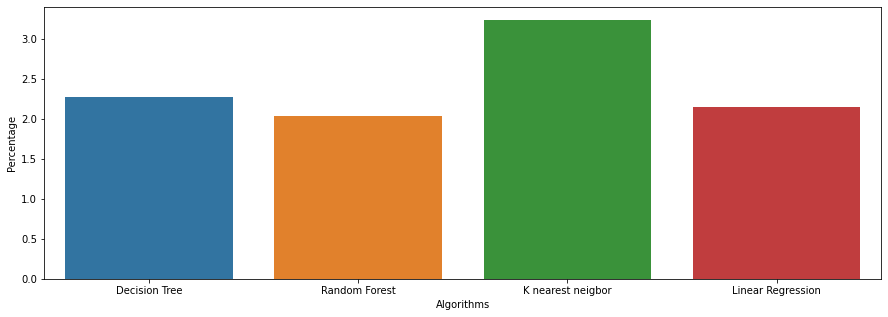

In [75]:
#performance plot of all algorithms
from matplotlib import pyplot as plt
import seaborn as sns
fig,(ax1)=plt.subplots(ncols=1,sharey=True,figsize=(15,5))
new_data=pd.DataFrame(list(accuracy1.items()),columns=['Algorithms','Percentage'])
display(new_data)
sns.barplot(x='Algorithms',y='Percentage',data=new_data,ax=ax1);

In [77]:
#accurate algorithm 
max_accuracy=min(accuracy1,key=accuracy1.get)
max_accuracy

'Random Forest'

In [79]:
#dataset
data.head()

,test_veh_configuration_#,test_veh_displacement_(l),vehicle_type,rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),averging_method_desc
0,0,5.9,1,470,6.0,6,2,4500,3.54,34.9,...,13.38,12.88,16.26,39.50,0.8444,0.0119,19.11,0.4320,0.0147,0
1,0,5.9,1,470,6.0,6,2,4500,3.54,34.9,...,15.50,18.80,21.30,39.50,0.8444,0.0119,19.11,0.4320,0.0147,0
2,0,5.9,1,470,12.0,6,2,4500,3.15,28.6,...,16.26,14.76,19.30,39.50,0.8444,0.0119,2.23,0.6948,0.0130,0
3,0,5.9,1,470,12.0,6,2,4500,3.15,28.6,...,15.50,18.80,21.30,39.50,0.8444,0.0119,2.23,0.6948,0.0130,0
4,0,5.9,1,510,6.0,6,2,4500,3.46,31.2,...,14.48,13.28,17.15,43.17,0.7502,0.0163,17.40,0.2270,0.0209,0


In [80]:
#implementing the random forest regression model
dataset=data
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values

In [81]:
#generating test-train split as 80-20 split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [88]:
#prediction using random forest regression and the results
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
outputs=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
outputs.head()

,y_pred,y_test
0,5.000000,5.0
1,7.652659,6.0
2,6.000000,6.0
3,10.000000,10.0
4,4.822639,4.0


In [89]:
#finding accuracies using mean absolute error, mean squared error and root mean squared error
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.1302731643898925
mean squared error: 0.16390773240939133
root mean squared error: 0.4048551993112986


In [98]:
#testing the same random forest algorithm with more estimators and prediction results
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
outputs=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
outputs.head()

,y_pred,y_test
0,5.000000,5.0
1,7.679638,6.0
2,6.000000,6.0
3,10.000000,10.0
4,4.833076,4.0


In [99]:
#finding accuracies using mean absolute error, mean squared error and root mean squared error for updated estimators count
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.12952808876642782
mean squared error: 0.15803380305473938
root mean squared error: 0.39753465641971314


In [25]:
#multiple linear regression for the same dataset
lin_dataset=data
lin_dataset.drop(['averging_method_desc'],axis=1,inplace=True)
X=pd.DataFrame(lin_dataset.iloc[:,:-1])
y=pd.DataFrame(lin_dataset.iloc[:,-1])

In [26]:
#explanatory variables
X

,test_veh_configuration_#,test_veh_displacement_(l),vehicle_type,rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,nox_(g/mi),rnd_adj_fe,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph)
0,0,5.900,1,470,6.0,6,2,4500,3.54,34.9,...,0.0211,13.8,13.3800,12.8800,16.2600,39.50,0.8444,0.01190,19.11,0.4320
1,0,5.900,1,470,6.0,6,2,4500,3.54,34.9,...,0.0079,23.7,15.5000,18.8000,21.3000,39.50,0.8444,0.01190,19.11,0.4320
2,0,5.900,1,470,12.0,6,2,4500,3.15,28.6,...,0.0420,16.1,16.2600,14.7600,19.3000,39.50,0.8444,0.01190,2.23,0.6948
3,0,5.900,1,470,12.0,6,2,4500,3.15,28.6,...,0.0080,27.2,15.5000,18.8000,21.3000,39.50,0.8444,0.01190,2.23,0.6948
4,0,5.900,1,510,6.0,6,2,4500,3.46,31.2,...,0.0230,14.4,14.4800,13.2800,17.1500,43.17,0.7502,0.01630,17.40,0.2270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,2,3.192,3,235,6.0,6,2,5000,4.06,33.3,...,0.1230,16.4,13.9700,16.3000,19.3100,57.97,0.1783,0.02663,22.50,0.1590
3270,2,3.192,3,235,6.0,6,2,5000,4.06,33.3,...,0.0220,18.7,18.3226,17.7487,21.0546,57.97,0.1783,0.02663,20.14,0.1276
3271,2,3.192,3,235,6.0,6,2,5000,4.06,33.3,...,0.0070,29.7,15.5000,18.8000,21.3000,57.97,0.1783,0.02663,20.14,0.1276
3272,2,4.414,3,311,8.0,6,2,5250,3.33,27.3,...,0.0070,16.1,15.5000,18.8000,21.3000,65.16,0.1588,0.02615,29.65,-0.0549


In [27]:
#outcome variables
y

,set_coef_c_(lbf/mph**2)
0,0.01470
1,0.01470
2,0.01300
3,0.01300
4,0.02090
...,...
3269,0.30000
3270,0.02674
3271,0.02674
3272,0.02725


In [28]:
#develop test train split as 80-20 split with multiple linear regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

v=pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w=pd.DataFrame(X.columns,columns=['Attribute'])

(2619, 26)
(655, 26)
(2619, 1)
(655, 1)


In [29]:
#finding the coefficient values
coeff_df=pd.concat([w,v],axis=1,join='inner')
coeff_df

,Attribute,Co-efficient
0,test_veh_configuration_#,0.000773
1,test_veh_displacement_(l),0.000010
2,vehicle_type,0.000910
3,rated_horsepower,-0.001714
4,#_of_cylinders_and_rotors,0.000153
5,#_of_gears,-0.000493
6,transmission_overdrive_code,-0.000027
7,equivalent_test_weight_(lbs.),0.001546
8,axle_ratio,0.001995
9,n/v_ratio,-0.000417


In [30]:
#print(regressor.intercept_)

#print(regressor.coef_)
#estimate the predicted values
y_pred=regressor.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['predicted'])
y_pred


,predicted
0,0.020978
1,0.021932
2,0.023203
3,0.033095
4,0.035591
...,...
650,0.019104
651,0.021840
652,0.023609
653,0.022167


In [31]:
#test values
y_test

,set_coef_c_(lbf/mph**2)
2270,0.020940
769,0.025860
412,0.022190
1300,0.036900
2962,0.039301
...,...
1968,0.019509
1919,0.021260
2113,0.021720
1433,0.020440


In [32]:
#regression intercept and regression coefficient values
print(regressor.intercept_)

print(regressor.coef_)

[0.02382105]
[[ 7.72568685e-04  1.03446914e-05  9.09519142e-04 -1.71364927e-03
   1.53384911e-04 -4.92969323e-04 -2.67381330e-05  1.54566068e-03
   1.99546458e-03 -4.17235550e-04 -2.62656664e-04 -1.61476251e-03
   8.65718159e-04  1.79364126e-04  9.15923535e-05 -9.78179478e-04
   8.84493681e-04 -3.30246346e-03  1.98641562e-04  6.73454607e-04
  -1.22917923e-03  3.28568466e-04  1.63025207e-03  2.72710556e-03
  -3.03954943e-04 -2.81941523e-03]]


In [33]:
#finding accuracies using mean absolute error, mean squared error and root mean squared error for multiple linear regression model
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


mean absolute error: 0.00373997574327998
mean squared error: 0.00011379823702703266
root mean squared error: 0.010667625650866862


In [42]:
#consider 2020 dataset
data20=cdf_20

In [43]:
data20

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.200,HASXV05.2AM5,Car,...,0.01690,0.027100,6.810,0.08070,0.024500,TWC,Three-way catalyst,N,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.200,HASXV05.2AM5,Car,...,0.01690,0.027100,6.810,0.08070,0.024500,TWC,Three-way catalyst,N,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.000,JASXV04.0AES,Car,...,0.01690,0.027100,11.260,0.09190,0.025100,TWC,Three-way catalyst,N,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.000,JASXV04.0AES,Car,...,0.01690,0.027100,11.260,0.09190,0.025100,TWC,Three-way catalyst,N,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.200,KASXV05.2AM5,Car,...,0.01690,0.027100,6.810,0.08070,0.024500,TWC,Three-way catalyst,N,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,2020,Volvo,VVX,Volvo,XC90 T6 AWD,202020,0,1.969,LVVXJ02.0S30,Both,...,0.36984,0.023778,9.020,0.31351,0.023655,TWC,Three-way catalyst,N,N,No averaging
4396,2020,Volvo,VVX,Volvo,XC90 T8 AWD,202001,1,1.969,LVVXJ02.0P30,Both,...,-0.06902,0.028608,-10.683,0.05236,0.026256,TWC,Three-way catalyst,N,N,No averaging
4397,2020,Volvo,VVX,Volvo,XC90 T8 AWD,202001,1,1.969,LVVXJ02.0P30,Both,...,-0.06902,0.028608,-10.683,0.05236,0.026256,TWC,Three-way catalyst,N,N,No averaging
4398,2020,Volvo,VVX,Volvo,XC90 T8 AWD,202001,1,1.969,LVVXJ02.0P30,Both,...,-0.06902,0.028608,-10.683,0.05236,0.026256,TWC,Three-way catalyst,N,N,No averaging


{'Decision Tree': 1.2575537563215071, 'Random Forest': 6.117184171684423, 'K nearest neigbor': 22.45647630444264, 'Linear Regression': 6.761215276699768}
{'Decision Tree': 1.4800547042192902, 'Random Forest': 1.146830863549215, 'K nearest neigbor': 3.0012507587575894, 'Linear Regression': 5.6024511631007545}


,Algorithms,Percentage
0,Decision Tree,1.480055
1,Random Forest,1.146831
2,K nearest neigbor,3.001251
3,Linear Regression,5.602451


'Random Forest'

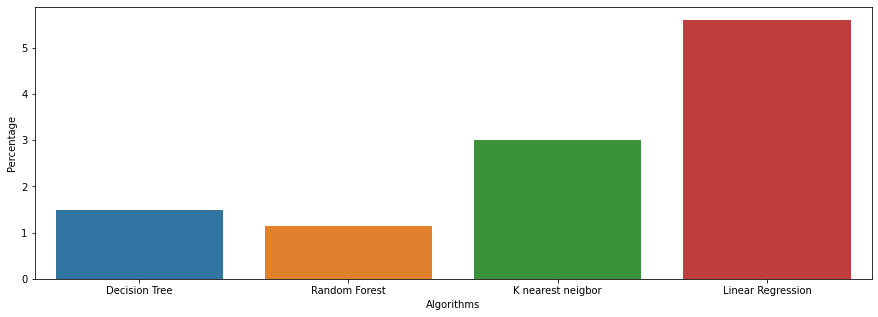

In [44]:
#testing performance of differnt algorithms and getting the best accurate algorithm
data20=cdf_20
data20.drop(['model_year','vehicle_manufacturer_name','veh_mfr_code','represented_test_veh_make','represented_test_veh_model','test_vehicle_id','actual_tested_testgroup','engine_code','tested_transmission_type_code','tested_transmission_type','transmission_lockup?','drive_system_code','drive_system_description','transmission_overdrive_desc','shift_indicator_light_use_desc','test_number','test_originator','analytically_derived_fe?','test_procedure_description','test_fuel_type_description','test_category','aftertreatment_device_cd','aftertreatment_device_desc','police_-_emergency_vehicle?','averaging_method_cd'],axis=1,inplace=True)
data20
data20['vehicle_type'].value_counts()
data20['averging_method_desc'].value_counts()
data20['fe_unit'].value_counts()
data20.drop(['fe_unit'],axis=1,inplace=True)
data20.columns
cleanup_data20={"vehicle_type":{"Car":1,"Truck":2,"Both":3},"averging_method_desc":{"No averaging":0,"Harmonic averaging (1/(Sum(i=1 to n) (FET(i) / WT(i)))":1,"Simple averaging (Sum(i=1 to n) (FET(i)  *  WT(i))) ":2}}
data20.replace(cleanup_data,inplace=True)
data20.head()
data20.dtypes
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
training,test=train_test_split(data20,train_size=0.7,test_size=0.3,shuffle=True)
training,valid=train_test_split(training,train_size=0.7,test_size=0.3,shuffle=True)
training_label=training.pop('fe_bag_1')
test_label=test.pop('fe_bag_1')
valid_label=valid.pop('fe_bag_1')
dtc=DecisionTreeRegressor()
rfc=RandomForestRegressor()
knn=KNeighborsRegressor()
lr=LinearRegression()
dtc.fit(training,training_label)
rfc.fit(training,training_label)
knn.fit(training,training_label)
lr.fit(training,training_label)
dtc_predict=dtc.predict(test)
rfc_predict=rfc.predict(test)
knn_predict=knn.predict(test)
lr_predict=lr.predict(test)
from sklearn.metrics import mean_squared_error
import math
accuracy=dict()
accuracy['Decision Tree']=math.sqrt(mean_squared_error(test_label,dtc_predict))
accuracy['Random Forest']=math.sqrt(mean_squared_error(test_label,rfc_predict))
accuracy['K nearest neigbor']=math.sqrt(mean_squared_error(test_label,knn_predict))
accuracy['Linear Regression']=math.sqrt(mean_squared_error(test_label,lr_predict))
print(accuracy)
#validation testing
dtc_predict=dtc.predict(valid)
rfc_predict=rfc.predict(valid)
knn_predict=knn.predict(valid)
lr_predict=lr.predict(valid)
#accuracy1
accuracy1=dict()
accuracy1['Decision Tree']=math.sqrt(mean_squared_error(valid_label,dtc_predict))
accuracy1['Random Forest']=math.sqrt(mean_squared_error(valid_label,rfc_predict))
accuracy1['K nearest neigbor']=math.sqrt(mean_squared_error(valid_label,knn_predict))
accuracy1['Linear Regression']=math.sqrt(mean_squared_error(valid_label,lr_predict))
print(accuracy1)
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':dtc.predict(valid)})
results.head()
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':rfc.predict(valid)})
results.head()
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':knn.predict(valid)})
results.head()
results=pd.DataFrame({'label fe_bag_1 mpg':valid_label,'prediction value':lr.predict(valid)})
results.head()
#performance plot of algorithms
from matplotlib import pyplot as plt
import seaborn as sns
fig,(ax1)=plt.subplots(ncols=1,sharey=True,figsize=(15,5))
new_data=pd.DataFrame(list(accuracy1.items()),columns=['Algorithms','Percentage'])
display(new_data)
sns.barplot(x='Algorithms',y='Percentage',data=new_data,ax=ax1);
max_accuracy=min(accuracy1,key=accuracy1.get)
max_accuracy

In [46]:
#performing random forest regression
dataset_20=data
X=dataset_20.iloc[:,0:4].values
y=dataset_20.iloc[:,4].values
#generate test-train split as 80-20 split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
outputs=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
#prediction and results along with mean absolute error, MSE and RMSE values and knowing the accuracy
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
outputs.head()

mean absolute error: 0.1302731643898925
mean squared error: 0.16390773240939133
root mean squared error: 0.4048551993112986


,y_pred,y_test
0,5.000000,5.0
1,7.652659,6.0
2,6.000000,6.0
3,10.000000,10.0
4,4.822639,4.0


In [47]:
#finding accuracies using mean absolute error, mean squared error and root mean squared error for updated estimators count
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
outputs=pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
from sklearn import metrics
import numpy as np
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
outputs.head()

mean absolute error: 0.12952808876642782
mean squared error: 0.15803380305473938
root mean squared error: 0.39753465641971314


,y_pred,y_test
0,5.000000,5.0
1,7.679638,6.0
2,6.000000,6.0
3,10.000000,10.0
4,4.833076,4.0


Text(0.5, 1.05, "Correlation of 2020 models' features")

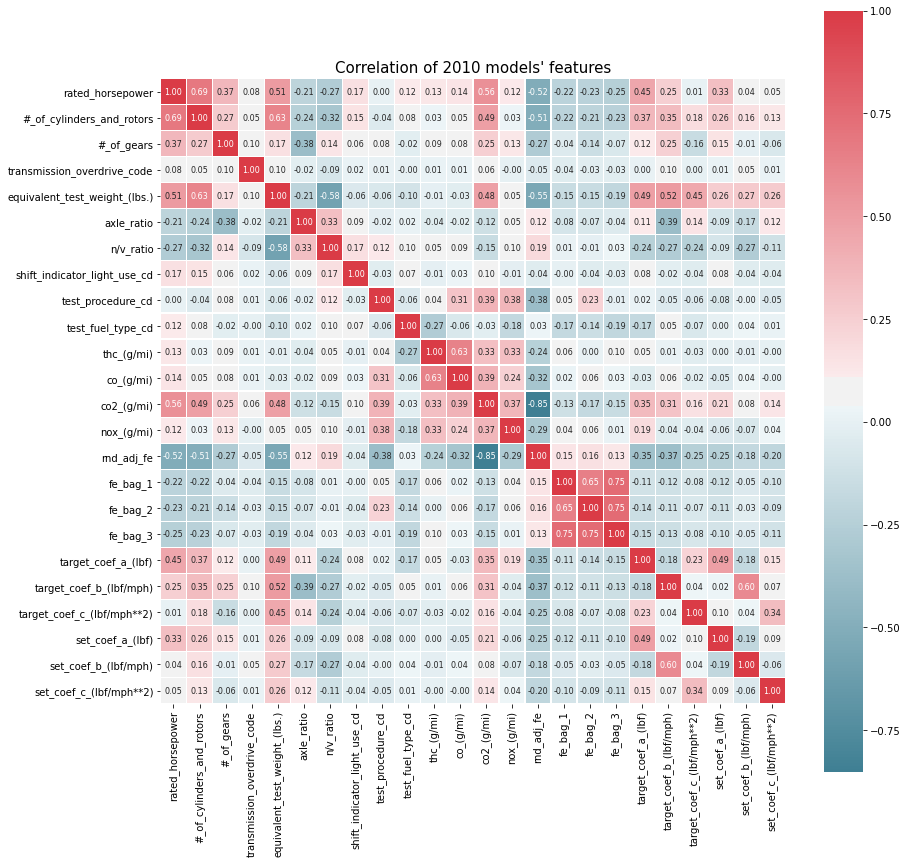

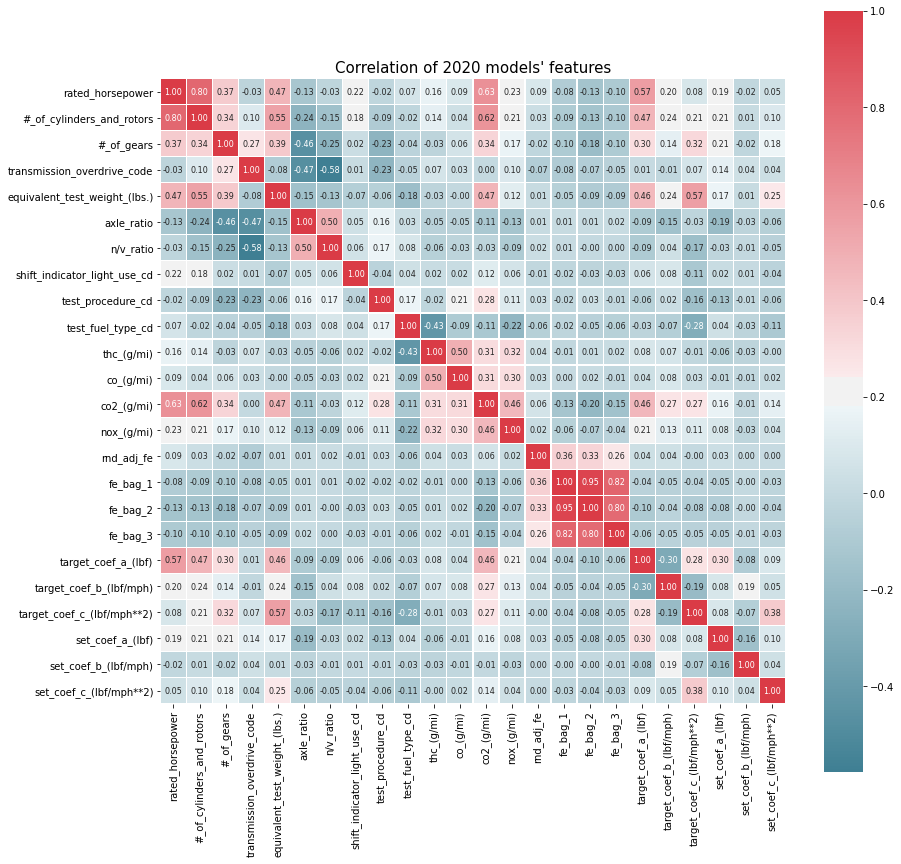

In [35]:

#correlation of features with updated dataset features
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import json
import re
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#hiding warnings for clean display
warnings.filterwarnings('ignore')

cdf_10=pd.read_csv('Data/clean_10.csv')
cdf_20=pd.read_csv('Data/clean_20.csv')
#def reshaped(excel_obj,i):
#to drop column video removed or error
#sns.countplot(cdf_10['Result'],label="Count")
data1=cdf_10
data1.drop(['model_year','vehicle_manufacturer_name','veh_mfr_code','represented_test_veh_make','represented_test_veh_model','test_vehicle_id','actual_tested_testgroup','engine_code','tested_transmission_type_code','tested_transmission_type','transmission_lockup?','drive_system_code','drive_system_description','transmission_overdrive_desc','shift_indicator_light_use_desc','test_number','test_originator','analytically_derived_fe?','test_procedure_description','test_fuel_type_description','test_category','aftertreatment_device_cd','aftertreatment_device_desc','police_-_emergency_vehicle?','averaging_method_cd'],axis=1,inplace=True)
corr = data1.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.2, linecolor='white')
plt.title("Correlation of 2010 models' features", y=1.05, size=15)  
data2=cdf_20
data2.drop(['model_year','vehicle_manufacturer_name','veh_mfr_code','represented_test_veh_make','represented_test_veh_model','test_vehicle_id','actual_tested_testgroup','engine_code','tested_transmission_type_code','tested_transmission_type','transmission_lockup?','drive_system_code','drive_system_description','transmission_overdrive_desc','shift_indicator_light_use_desc','test_number','test_originator','analytically_derived_fe?','test_procedure_description','test_fuel_type_description','test_category','aftertreatment_device_cd','aftertreatment_device_desc','police_-_emergency_vehicle?','averaging_method_cd'],axis=1,inplace=True)
corr = data2.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.2, linecolor='white')
plt.title("Correlation of 2020 models' features", y=1.05, size=15)  


Text(0.5, 1.0, 'rnd_adj_fe vs. co2 production')

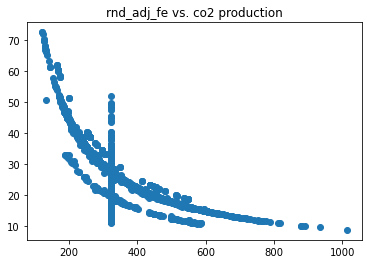

In [2]:
#2010
plt.scatter( data = data1 , x='co2_(g/mi)' , y = 'rnd_adj_fe') ;
plt.title('rnd_adj_fe vs. co2 production')

Text(0.5, 1.0, 'rnd_adj_fe vs. co2 production')

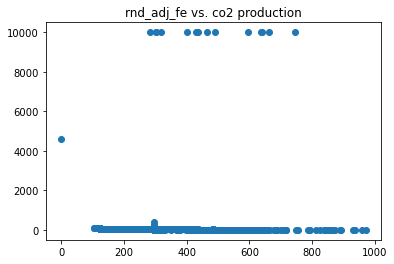

In [3]:
#2020
plt.scatter( data = data2 , x='co2_(g/mi)' , y = 'rnd_adj_fe') ;
plt.title('rnd_adj_fe vs. co2 production')

Text(0.5, 1.0, 'rated horsepower vs. number of cylinders and rotors')

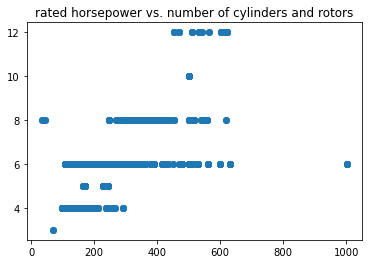

In [4]:
#2010
plt.scatter( data = data1 , x='rated_horsepower' , y = '#_of_cylinders_and_rotors') ;
plt.title('rated horsepower vs. number of cylinders and rotors')

Text(0.5, 1.0, 'rated horsepower vs. number of cylinders and rotors')

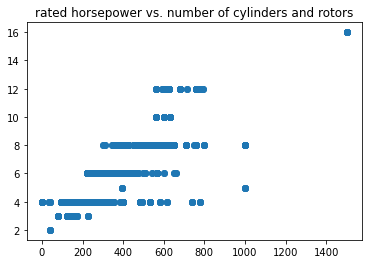

In [5]:
#2020
plt.scatter( data = data2 , x='rated_horsepower' , y = '#_of_cylinders_and_rotors') ;
plt.title('rated horsepower vs. number of cylinders and rotors')

In [1]:
#modifying the 2020 dataset 
import pandas as pd
cdf_10=pd.read_csv('Data/clean_10.csv')
cdf_20=pd.read_csv('Data/clean_20.csv')
data20=cdf_20
data20.drop(['model_year','vehicle_manufacturer_name','veh_mfr_code','represented_test_veh_make','represented_test_veh_model','test_vehicle_id','actual_tested_testgroup','engine_code','tested_transmission_type_code','tested_transmission_type','transmission_lockup?','drive_system_code','drive_system_description','transmission_overdrive_desc','shift_indicator_light_use_desc','test_number','test_originator','analytically_derived_fe?','test_procedure_description','test_fuel_type_description','test_category','aftertreatment_device_cd','aftertreatment_device_desc','police_-_emergency_vehicle?','averaging_method_cd'],axis=1,inplace=True)
data20['averging_method_desc'].value_counts()
data20['fe_unit'].value_counts()
data20.drop(['fe_unit'],axis=1,inplace=True)
data20.columns
cleanup_data20={"averging_method_desc":{"No averaging":0,"Harmonic averaging (1/(Sum(i=1 to n) (FET(i) / WT(i)))":1,"Simple averaging (Sum(i=1 to n) (FET(i)  *  WT(i))) ":2}}
data20.replace(cleanup_data20,inplace=True)
data20.head()


,test_veh_configuration_#,test_veh_displacement_(l),vehicle_type,rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),averging_method_desc
0,0,5.2,Car,600,12.0,8,2,4500,2.70,22.2,...,17.8390,17.9850,21.6350,40.94,0.0169,0.0271,6.81,0.0807,0.0245,0
1,0,5.2,Car,600,12.0,8,2,4500,2.70,22.2,...,24.1000,27.9000,27.6000,40.94,0.0169,0.0271,6.81,0.0807,0.0245,0
2,0,4.0,Car,503,8.0,8,2,4500,2.70,22.2,...,22.7357,21.7727,24.8773,40.94,0.0169,0.0271,11.26,0.0919,0.0251,0
3,0,4.0,Car,503,8.0,8,2,4500,2.70,22.2,...,24.1000,27.9000,27.6000,40.94,0.0169,0.0271,11.26,0.0919,0.0251,0
4,0,5.2,Car,715,12.0,8,2,4500,2.93,23.0,...,16.9255,16.7052,20.9239,40.94,0.0169,0.0271,6.81,0.0807,0.0245,0


vehicles with type of averging method 2020:
No averaging                                                0
Harmonic averaging (1/(Sum(i=1 to n) (FET(i) / WT(i)))      1
Simple averaging (Sum(i=1 to n) (FET(i)  *  WT(i)))         2


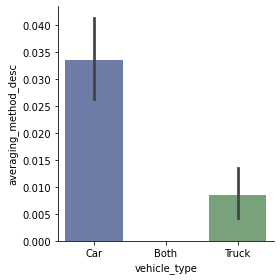

In [8]:
import seaborn as sns
g=sns.factorplot(data=cdf_20,kind='bar',x="vehicle_type",y="averging_method_desc",palette="dark",alpha=.6,height=4)
#g.despine(left=True)
g.set_axis_labels("vehicle_type","averaging_method_desc")
print("vehicles with type of averging method 2020:\nNo averaging                                                0\nHarmonic averaging (1/(Sum(i=1 to n) (FET(i) / WT(i)))      1\nSimple averaging (Sum(i=1 to n) (FET(i)  *  WT(i)))         2")

In [6]:
#ANALYSIS

In [4]:
#1.alternative sources of fuel in 2010
import pandas as pd
anls1=pd.read_csv('Data/clean_10.csv')
anls2=pd.read_csv('Data/clean_20.csv')
print("\n1. alternative sources of fuel in 2010\nAnswer:CNG,Cold CO and E85\n")
anls1['test_fuel_type_description'].value_counts()


1. alternative sources of fuel in 2010
Answer:CNG,Cold CO and E85



Tier 2 Cert Gasoline                           2674
CARB Phase II Gasoline                          239
E85 (85% Ethanol 15% EPA Unleaded Gasoline)     174
Federal Cert Diesel 7-15 PPM Sulfur             111
Cold CO Premium (Tier 2)                         48
Cold CO Regular (CERT)                           23
CNG                                               2
Cold CO Regular (Tier 2)                          2
EPA Unleaded Gasoline                             1
Name: test_fuel_type_description, dtype: int64

In [5]:
print("\n1. alternative sources of fuel in 2020\nAnswer:CNG,Cold CO ,Electricity,Hydrogen 5 and E85\n")
anls2['test_fuel_type_description'].value_counts()


1. alternative sources of fuel in 2020
Answer:CNG,Cold CO ,Electricity,Hydrogen 5 and E85



Tier 2 Cert Gasoline                             3825
Federal Cert Diesel 7-15 PPM Sulfur               165
Cold CO Regular (Tier 2)                          137
Electricity                                       106
Cold CO Premium (Tier 2)                           75
E85 (85% Ethanol 15% EPA Unleaded Gasoline)        67
Tier 3 E10 Premium Gasoline (9 RVP @Low Alt.)       9
Hydrogen 5                                          8
CARB LEV3 E10 Regular Gasoline                      3
Cold CO Diesel 7-15 ppm Sulfur                      3
Cold CO E10 Premium Gasoline (Tier 3)               2
Name: test_fuel_type_description, dtype: int64

In [11]:
#UNIQUE MODELS USED ALTERNATIVE SOURCES OF FUEL IN 2010 AND 2020
als1=anls1.query('test_fuel_type_description in ["CNG","E85 (85% Ethanol 15% EPA Unleaded Gasoline)","Cold CO Premium (Tier 2)","Cold CO Regular (CERT)","Cold CO Regular (Tier 2)"]').vehicle_manufacturer_name.nunique()
als2=anls2.query('test_fuel_type_description in ["CNG","E85 (85% Ethanol 15% EPA Unleaded Gasoline)","Cold CO Premium (Tier 2)","Cold CO Regular (Tier 2)","Hydrogen 5","Cold CO Diesel 7-15 ppm Sulfur","Cold CO E10 Premium Gasoline (Tier 3)","Electricity"]').vehicle_manufacturer_name.nunique()

Text(0, 0.5, 'Number of Unique models')

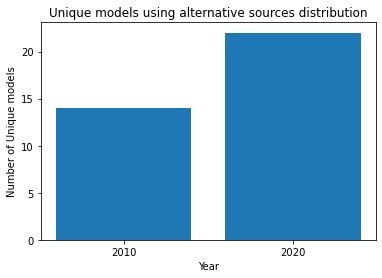

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(['2010','2020'],[als1,als2])
plt.title('Unique models using alternative sources distribution')
plt.xlabel('Year')
plt.ylabel('Number of Unique models')

In [12]:
als1 , als2

(14, 22)

In [14]:
print("More unique models using alternative sources of fuel in 2020 compared to 2008, look at proportions")
#total unique models each year
total_10=anls1.vehicle_manufacturer_name.nunique()
total_20=anls2.vehicle_manufacturer_name.nunique()
total_10,total_20

More unique models using alternative sources of fuel in 2020 compared to 2008, look at proportions


(33, 30)

In [16]:
prop_10=als1/total_10
prop_20=als2/total_20
prop_10,prop_20

(0.42424242424242425, 0.7333333333333333)

More unique models using alternate sources of fuel in 2020 compared to 2010 increased by 30.9%


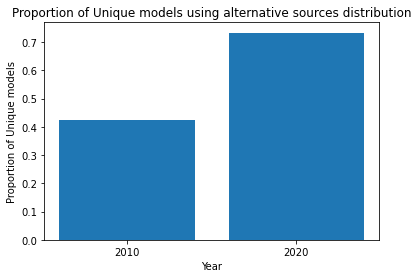

In [19]:
plt.bar(['2010','2020'],[prop_10,prop_20])
plt.title('Proportion of Unique models using alternative sources distribution')
plt.xlabel('Year')
plt.ylabel('Proportion of Unique models')
print("More unique models using alternate sources of fuel in 2020 compared to 2010 increased by 30.9%")

In [42]:
print("2.How much have vehicle drive systems improved in fuel economy?")
#average fuel economy for each dataset
import pandas as pd
anls3=pd.read_csv('Data/clean_10.csv')
anls4=pd.read_csv('Data/clean_20.csv')
print("\nyear:2010")
veh10=anls3.groupby('drive_system_description').fe_bag_1.mean()
veh10

2.How much have vehicle drive systems improved in fuel economy?

year:2010


drive_system_description
2-Wheel Drive, Front       17.534091
2-Wheel Drive, Rear        15.698903
4-Wheel Drive              15.773292
All Wheel Drive            16.769128
Part-time 4-Wheel Drive    15.769366
Name: fe_bag_1, dtype: float64

In [43]:
print("\nyear:2020")
veh20=anls4.groupby('drive_system_description').fe_bag_1.mean()
veh20


year:2020


drive_system_description
2-Wheel Drive, Front       26.792094
2-Wheel Drive, Rear        22.799922
4-Wheel Drive              38.985882
All Wheel Drive            22.326790
Part-time 4-Wheel Drive    21.283805
Name: fe_bag_1, dtype: float64

In [26]:
#how much have they increased for each drive system type
inc=veh20-veh10
inc

drive_system_description
2-Wheel Drive, Front        9.258003
2-Wheel Drive, Rear         7.101018
4-Wheel Drive              23.212590
All Wheel Drive             5.557662
Part-time 4-Wheel Drive     5.514439
Name: fe_bag_1, dtype: float64

Text(0, 0.5, 'Increase in average mpg')

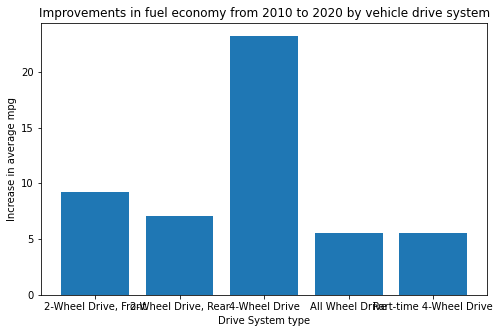

In [35]:
plt.subplots(figsize=(8,5))
plt.bar(inc.index,inc)
plt.title('Improvements in fuel economy from 2010 to 2020 by vehicle drive system')
plt.xlabel('Drive System type')
plt.ylabel('Increase in average mpg')

In [47]:
print("3.What are features associated with better fuel economy?")
print("Explore trends between mpg and other features in this dataset, select all vehicles that have the top 50% fuel economy ratings to see characteristics")
#average fuel economy for each dataset
import pandas as pd
anls5=pd.read_csv('Data/clean_10.csv')
anls6=pd.read_csv('Data/clean_20.csv')
print("\nyear:2010")
top10=anls5.query('fe_bag_1 > fe_bag_1.mean()')
top10.describe()

3.What are features associated with better fuel economy?
Explore trends between mpg and other features in this dataset, select all vehicles that have the top 50% fuel economy ratings to see characteristics

year:2010


,model_year,test_veh_configuration_#,test_veh_displacement_(l),rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,rnd_adj_fe,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2)
count,425.0,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,2010.0,0.832941,2.718113,224.607059,5.294118,5.458824,1.976471,4000.588235,3.507294,33.831059,...,26.484000,24.043329,25.803840,26.536420,36.795402,0.292507,0.020956,13.043311,0.090800,0.020388
std,0.0,1.241137,0.831314,76.390651,1.126687,1.440264,0.151756,677.184364,0.603275,5.898475,...,7.749381,7.048953,9.442594,6.088613,9.108965,0.221283,0.013134,8.970775,0.227775,0.014991
min,2010.0,0.000000,1.300000,98.000000,4.000000,1.000000,1.000000,2875.000000,1.000000,8.400000,...,16.600000,16.580000,15.429160,19.209500,17.916000,-0.479500,0.010050,-31.798000,-0.813000,-0.086800
25%,2010.0,0.000000,1.984000,170.000000,4.000000,5.000000,2.000000,3500.000000,3.140000,30.400000,...,21.300000,19.400000,19.551300,21.300000,30.000000,0.178300,0.017100,8.600000,-0.044000,0.017800
50%,2010.0,0.000000,2.480000,200.000000,6.000000,6.000000,2.000000,3750.000000,3.530000,32.400000,...,24.800000,21.848000,23.121100,24.900000,35.160000,0.273500,0.018600,13.000000,0.080000,0.019500
75%,2010.0,1.000000,3.000000,264.000000,6.000000,6.000000,2.000000,4250.000000,3.900000,39.200000,...,28.300000,26.000000,29.100000,29.379663,41.000000,0.387000,0.022310,17.192000,0.195400,0.022800
max,2010.0,8.000000,6.300000,621.000000,12.000000,8.000000,2.000000,6000.000000,5.800000,46.600000,...,66.600000,63.001570,98.024062,54.080187,71.280000,1.206900,0.200000,96.000000,1.092200,0.236380


In [46]:
print("\nyear:2020")
top20=anls6.query('fe_bag_1 > fe_bag_1.mean()')
top20.describe()


year:2020


,model_year,test_veh_configuration_#,test_veh_displacement_(l),rated_horsepower,#_of_cylinders_and_rotors,#_of_gears,transmission_overdrive_code,equivalent_test_weight_(lbs.),axle_ratio,n/v_ratio,...,rnd_adj_fe,fe_bag_1,fe_bag_2,fe_bag_3,target_coef_a_(lbf),target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2)
count,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,2020.0,1.375134,2.069923,199.285102,4.186495,5.497320,1.989282,3799.035370,3.642626,28.210397,...,61.971919,34.391598,42.087751,37.209497,35.032251,0.091365,0.021091,9.533805,0.116235,0.020477
std,0.0,2.177899,0.516183,68.727210,0.674131,3.091113,0.103027,541.349878,0.878333,7.207540,...,484.554361,55.175620,58.107474,45.143765,11.572996,0.277332,0.004278,8.683367,0.203331,0.016818
min,2020.0,0.000000,0.600000,1.000000,2.000000,1.000000,1.000000,2375.000000,1.560000,0.000000,...,24.000000,24.870300,18.572200,26.600000,15.431000,-0.665500,0.012344,-27.890000,-1.139000,-0.026201
25%,2020.0,0.000000,1.798000,148.000000,4.000000,1.000000,2.000000,3375.000000,3.100000,24.100000,...,28.500000,26.707562,27.929606,30.060200,26.780000,-0.090720,0.017900,4.790000,0.000000,0.016160
50%,2020.0,1.000000,2.000000,185.000000,4.000000,6.000000,2.000000,3750.000000,3.470000,26.700000,...,32.400000,29.189391,31.938600,32.958900,32.753000,0.159800,0.021020,9.257000,0.118400,0.018723
75%,2020.0,2.000000,2.400000,248.000000,4.000000,8.000000,2.000000,4000.000000,4.090000,31.100000,...,38.700000,33.902200,39.007339,38.878165,41.660000,0.300100,0.023900,14.740000,0.214070,0.022140
max,2020.0,19.000000,4.969000,472.000000,8.000000,10.000000,2.000000,6000.000000,9.660000,122.600000,...,10000.000000,999.000000,999.000000,999.000000,66.400000,0.885800,0.039990,45.700000,1.060100,0.252080


In [50]:
print("4.For all the models that were produced in 2010 that are still being produced now, how much has the mpg improved and which vehicle improved the most?")
print("\nsteps:\n1.Create a dataframe , model_mpg that contain the mean mpg values in 2010 and 2020 for each unique model. To do this, group by model and find the mean mpg_2010 and mean mpg_2020 for each.\n2.Create a new column, mpg_change, with change in mpg. Subtract the mean mpg in 2010 from that in 2020 to get change in mpg\n3.Find the vehicle that improved the most. Find the max mpg change, and then use query or indexing to see what model it is!")


4.For all the models that were produced in 2010 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

steps:
1.Create a dataframe , model_mpg that contain the mean mpg values in 2010 and 2020 for each unique model. To do this, group by model and find the mean mpg_2010 and mean mpg_2020 for each.
2.Create a new column, mpg_change, with change in mpg. Subtract the mean mpg in 2010 from that in 2020 to get change in mpg
3.Find the vehicle that improved the most. Find the max mpg change, and then use query or indexing to see what model it is!


In [16]:
#load datasets
import pandas as pd
anls7=pd.read_csv('Data/clean_10.csv')
anls8=pd.read_csv('Data/clean_20.csv')
#merge datasets
new_anls7=anls7.loc[:,['model_year','vehicle_manufacturer_name','represented_test_veh_make','represented_test_veh_model','fe_bag_1']]
new_anls8=anls8.loc[:,['model_year','vehicle_manufacturer_name','represented_test_veh_make','represented_test_veh_model','fe_bag_1']]
#rename 2010 columns
new_anls7.rename(columns=lambda x:  x[:36]+"_2010",inplace=True)
#merge datasets
comb_df=pd.merge(new_anls7,new_anls8,left_on='vehicle_manufacturer_name_2010',right_on='vehicle_manufacturer_name',how='inner')

In [17]:
comb_df.head()

,model_year_2010,vehicle_manufacturer_name_2010,represented_test_veh_make_2010,represented_test_veh_model_2010,fe_bag_1_2010,model_year,vehicle_manufacturer_name,represented_test_veh_make,represented_test_veh_model,fe_bag_1
0,2010,aston martin,Aston Martin,DB9,13.38,2020,aston martin,Aston Martin,DB11,17.8390
1,2010,aston martin,Aston Martin,DB9,13.38,2020,aston martin,Aston Martin,DB11,24.1000
2,2010,aston martin,Aston Martin,DB9,13.38,2020,aston martin,Aston Martin,DB11 V8,22.7357
3,2010,aston martin,Aston Martin,DB9,13.38,2020,aston martin,Aston Martin,DB11 V8,24.1000
4,2010,aston martin,Aston Martin,DB9,13.38,2020,aston martin,Aston Martin,DBS,16.9255


In [28]:
#step 1: To do this group by model and find the mean mpg_2010 and mean mpg for each
model_mpg=comb_df.groupby('vehicle_manufacturer_name').mean()[['fe_bag_1_2010','fe_bag_1']]
model_mpg.head()

,fe_bag_1_2010,fe_bag_1
vehicle_manufacturer_name,,
BMW,15.767962,24.871952
FCA US LLC,15.453958,22.956352
FOMOCO,16.961099,23.454906
Ferrari,15.361973,20.060000
GM,15.683160,22.182315


In [29]:
#step 2:
model_mpg['mpg_change']=model_mpg['fe_bag_1']-model_mpg['fe_bag_1_2010']
model_mpg.head()

,fe_bag_1_2010,fe_bag_1,mpg_change
vehicle_manufacturer_name,,,
BMW,15.767962,24.871952,9.103989
FCA US LLC,15.453958,22.956352,7.502393
FOMOCO,16.961099,23.454906,6.493807
Ferrari,15.361973,20.060000,4.698027
GM,15.683160,22.182315,6.499155


In [30]:
#step 3:
max_change=model_mpg['mpg_change'].max()
max_change

12.362617245454079

In [34]:
print("Mitsubishi Motors Co improved its models the most")
model_mpg[model_mpg['mpg_change']==max_change]

Mitsubishi Motors Co improved its models the most


,fe_bag_1_2010,fe_bag_1,mpg_change
vehicle_manufacturer_name,,,
Mitsubishi Motors Co,15.5,27.862617,12.362617


In [4]:
#checking only for cars
#load datasets
import pandas as pd
anls9=pd.read_csv('Data/clean_10.csv')
anls10=pd.read_csv('Data/clean_20.csv')
cars2010=anls9[anls9['vehicle_type']=='Car']
cars2010

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.900,9ASXV05.9VH1,Car,...,0.8444,0.01190,19.11,0.4320,0.01470,TWC,Three-way catalyst,N,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.900,9ASXV05.9VH1,Car,...,0.8444,0.01190,19.11,0.4320,0.01470,TWC,Three-way catalyst,N,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.900,AASXV05.9VH1,Car,...,0.8444,0.01190,2.23,0.6948,0.01300,TWC,Three-way catalyst,N,N,No averaging
3,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.900,AASXV05.9VH1,Car,...,0.8444,0.01190,2.23,0.6948,0.01300,TWC,Three-way catalyst,N,N,No averaging
4,2010,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.900,9ASXV05.9VH1,Car,...,0.7502,0.01630,17.40,0.2270,0.02090,TWC,Three-way catalyst,N,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,2010,Volvo,VVX,Volvo,V50 T5 AWD,201017,1,2.521,AVVXV02.5U2T,Car,...,0.3679,0.02019,15.54,0.1203,0.02119,TWC,Three-way catalyst,N,N,No averaging
3227,2010,Volvo,VVX,Volvo,V50 T5 AWD,201017,1,2.521,AVVXV02.5U2T,Car,...,0.3679,0.02019,15.54,0.1203,0.02119,TWC,Three-way catalyst,N,N,No averaging
3228,2010,Volvo,VVX,Volvo,V50 T5 AWD,201017,1,2.521,AVVXV02.5U2T,Car,...,0.3679,0.02019,15.54,0.1203,0.02119,TWC,Three-way catalyst,N,N,No averaging
3229,2010,Volvo,VVX,Volvo,V50 T5 AWD,201017,1,2.521,AVVXV02.5U2T,Car,...,0.3679,0.02019,15.54,0.1203,0.02119,TWC,Three-way catalyst,N,N,No averaging


In [5]:
cars2020=anls10[anls10['vehicle_type']=='Car']
cars2020

,model_year,vehicle_manufacturer_name,veh_mfr_code,represented_test_veh_make,represented_test_veh_model,test_vehicle_id,test_veh_configuration_#,test_veh_displacement_(l),actual_tested_testgroup,vehicle_type,...,target_coef_b_(lbf/mph),target_coef_c_(lbf/mph**2),set_coef_a_(lbf),set_coef_b_(lbf/mph),set_coef_c_(lbf/mph**2),aftertreatment_device_cd,aftertreatment_device_desc,police_-_emergency_vehicle?,averaging_method_cd,averging_method_desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.200,HASXV05.2AM5,Car,...,0.01690,0.027100,6.81,0.0807,0.02450,TWC,Three-way catalyst,N,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.200,HASXV05.2AM5,Car,...,0.01690,0.027100,6.81,0.0807,0.02450,TWC,Three-way catalyst,N,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.000,JASXV04.0AES,Car,...,0.01690,0.027100,11.26,0.0919,0.02510,TWC,Three-way catalyst,N,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.000,JASXV04.0AES,Car,...,0.01690,0.027100,11.26,0.0919,0.02510,TWC,Three-way catalyst,N,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.200,KASXV05.2AM5,Car,...,0.01690,0.027100,6.81,0.0807,0.02450,TWC,Three-way catalyst,N,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,2020,Volvo,VVX,Polestar,Polestar 1,202010,0,1.969,LVVXV02.0P3R,Car,...,0.25460,0.019570,-15.06,0.3482,0.01703,TWC,Three-way catalyst,N,N,No averaging
4356,2020,Volvo,VVX,Polestar,Polestar 1,202010,0,1.969,LVVXV02.0P3R,Car,...,0.25460,0.019570,-15.06,0.3482,0.01703,TWC,Three-way catalyst,N,N,No averaging
4357,2020,Volvo,VVX,Polestar,Polestar 1,202010,0,1.969,LVVXV02.0P3R,Car,...,0.28290,0.021740,-15.80,0.5840,0.01660,TWC,Three-way catalyst,N,N,No averaging
4376,2020,Volvo,VVX,Volvo,XC40 T4 FWD,201924,1,1.969,KVVXV02.0U7B,Car,...,0.26188,0.021949,9.80,0.1220,0.02280,TWC,Three-way catalyst,N,N,No averaging


In [15]:
car10=cars2010.loc[:,['model_year','vehicle_manufacturer_name','represented_test_veh_make','represented_test_veh_model','fe_bag_1']]
car20=cars2020.loc[:,['model_year','vehicle_manufacturer_name','represented_test_veh_make','represented_test_veh_model','fe_bag_1']]
#rename 2010 columns
car10.rename(columns=lambda x:  x[:36]+"_2010",inplace=True)
#merge datasets
comb_car_df=pd.merge(car10,car20,left_on='represented_test_veh_make_2010',right_on='represented_test_veh_make',how='inner')

In [16]:
#step 1: To do this group by model and find the mean mpg_2010 and mean mpg for each
car_model_mpg=comb_car_df.groupby('represented_test_veh_make').mean()[['fe_bag_1_2010','fe_bag_1']]
car_model_mpg.head()
#step 2:
car_model_mpg['car_mpg_change']=car_model_mpg['fe_bag_1']-car_model_mpg['fe_bag_1_2010']
car_model_mpg.head()
#step 3:
car_max_change=car_model_mpg['car_mpg_change'].max()
car_max_change
print("Mitsubishi car model improved the most")
car_model_mpg[car_model_mpg['car_mpg_change']==car_max_change]
#Mitsubishi car model improved the most

,fe_bag_1_2010,fe_bag_1,car_mpg_change
represented_test_veh_make,,,
MITSUBISHI,15.5,34.442625,18.942625


In [14]:
#checking only for trucks
#load datasets
import pandas as pd
anls11=pd.read_csv('Data/clean_10.csv')
anls12=pd.read_csv('Data/clean_20.csv')
trucks2010=anls11[anls11['vehicle_type']=='Truck']
trucks2010
trucks2020=anls12[anls12['vehicle_type']=='Truck']
trucks2020
truck10=trucks2010.loc[:,['model_year','vehicle_manufacturer_name','represented_test_veh_make','represented_test_veh_model','fe_bag_1']]
truck20=trucks2020.loc[:,['model_year','vehicle_manufacturer_name','represented_test_veh_make','represented_test_veh_model','fe_bag_1']]
#rename 2010 columns
truck10.rename(columns=lambda x:  x[:36]+"_2010",inplace=True)
#merge datasets
comb_truck_df=pd.merge(truck10,truck20,left_on='represented_test_veh_make_2010',right_on='represented_test_veh_make',how='inner')
#step 1: To do this group by model and find the mean mpg_2010 and mean mpg for each
truck_model_mpg=comb_truck_df.groupby('represented_test_veh_make').mean()[['fe_bag_1_2010','fe_bag_1']]
truck_model_mpg.head()
#step 2:
truck_model_mpg['truck_mpg_change']=truck_model_mpg['fe_bag_1']-truck_model_mpg['fe_bag_1_2010']
truck_model_mpg.head()
#step 3:
truck_max_change=truck_model_mpg['truck_mpg_change'].max()
truck_max_change
print("honda truck model improved the most")
truck_model_mpg[truck_model_mpg['truck_mpg_change']==truck_max_change]
#HONDA truck model improved the most

,fe_bag_1_2010,fe_bag_1,truck_mpg_change
represented_test_veh_make,,,
HONDA,15.633333,26.743632,11.110299
